# IPL Insights
### Importing all the library
numpy, pandas, matplotlib, seaborn, math, pylab, json, datetime

In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
import math

from IPython.display import Markdown, display
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from gmplot import gmplot

%matplotlib inline

## Storing csv file in a variable
Storing matches.csv in variable data_setm

In [2]:
data_setm = pd.read_csv('datasets/matches.csv',keep_default_na=False)

data_setm.columns = ['match_id','season','city','date','team1','team2','toss_winner','toss_decision','result','dl_applied','winner','win_by_runs','win_by_wickets','player_of_match','venue','umpire1','umpire2','umpire3']
data_setm.head(5)

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,,,


In [3]:
print(data_setm.columns.values)

['match_id' 'season' 'city' 'date' 'team1' 'team2' 'toss_winner'
 'toss_decision' 'result' 'dl_applied' 'winner' 'win_by_runs'
 'win_by_wickets' 'player_of_match' 'venue' 'umpire1' 'umpire2' 'umpire3']


### Ploting the Histogram of the Matches in Each season

In [4]:
def histogram_plot(dataset, title):
    plt.figure(figsize=(8, 6))    
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.title(title, fontsize = 22)
    plt.hist(dataset, edgecolor='black', linewidth=1)

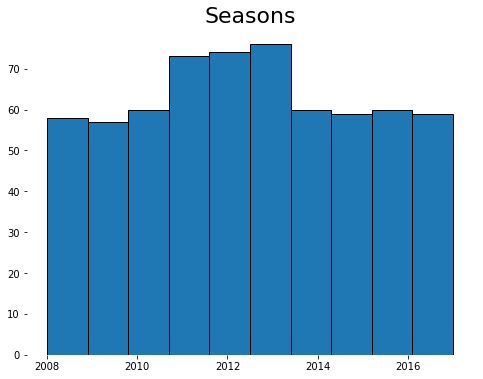

In [5]:
season_years = list([data_setm['season']])
histogram_plot(season_years, title = "Seasons")
plt.show()

## Storing csv file in a variable
storing deliveries.csv in variable data_set

In [6]:
data_set = pd.read_csv('datasets/deliveries.csv')
data_set.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
print(data_set.columns.values)

['match_id' 'inning' 'batting_team' 'bowling_team' 'over' 'ball' 'batsman'
 'non_striker' 'bowler' 'is_super_over' 'wide_runs' 'bye_runs'
 'legbye_runs' 'noball_runs' 'penalty_runs' 'batsman_runs' 'extra_runs'
 'total_runs' 'player_dismissed' 'dismissal_kind' 'fielder']


### Merging the two CSV dataframes in single dataframe

In [8]:
data_set = pd.merge(data_set, data_setm, on='match_id')
data_set.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,


## Creating custom list
list contains match_id,batsman's name, runs scored, is_super_over

In [9]:
Player_Runs  = list([data_set['match_id'],data_set['batsman'],data_set['batsman_runs'],data_set['is_super_over'],data_set['wide_runs'],data_set['noball_runs'],data_set['season']])

### Get the Match Id for particular season

In [10]:
input_year = int(input("Enter the year to see the statistics :"))
Years = list([[data_setm['season']],[data_setm['match_id']]])
print("Match id of match during the year are :")
match_during_input_year = []
for i in range(len(Years[0][0])):
    if(Years[0][0][i]==input_year):
        match_during_input_year.append(Years[1][0][i])
print(match_during_input_year)
print("Total no. of matches in that year :",len(match_during_input_year))
#for id we use Years[1][0][i]
#for year we use Years[0][0][i]

Enter the year to see the statistics :2017
Match id of match during the year are :
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
Total no. of matches in that year : 59


### Finding the list of Players who have batted
player contains the list of players

In [11]:
player = set()
for i in range(len(Player_Runs[0:][1])):
    player.add(Player_Runs[0:][1][i])
#print(player)

In [12]:
player_list = list(player)
print(player_list)

['AT Rayudu', 'SS Shaikh', 'Z Khan', 'DE Bollinger', 'PC Valthaty', 'SA Asnodkar', 'AA Bilakhia', 'AD Nath', 'SS Tiwary', 'GJ Bailey', 'P Awana', 'S Badrinath', 'Mohammad Ashraful', 'RR Raje', 'SM Pollock', 'DPMD Jayawardene', 'KP Appanna', 'HV Patel', 'JP Faulkner', 'NLTC Perera', 'SN Thakur', 'SB Wagh', 'K Rabada', 'MS Wade', 'Harbhajan Singh', 'AB de Villiers', 'A Mithun', 'NL McCullum', 'KMDN Kulasekara', 'C Nanda', 'DS Lehmann', 'KM Jadhav', 'Sunny Gupta', 'C de Grandhomme', 'VVS Laxman', 'A Uniyal', 'Mashrafe Mortaza', 'UT Yadav', 'TM Dilshan', 'GJ Maxwell', 'DB Ravi Teja', 'S Rana', 'KK Cooper', 'RR Bhatkal', 'W Jaffer', 'RS Bopara', 'MJ Clarke', 'V Shankar', 'Sunny Singh', 'AUK Pathan', 'CK Langeveldt', 'Anirudh Singh', 'BA Bhatt', 'A Mukund', 'X Thalaivan Sargunam', 'S Badree', 'CRD Fernando', 'Basil Thampi', 'KC Cariappa', 'Bipul Sharma', 'S Kaul', 'T Taibu', 'RR Pant', 'CL White', 'S Tyagi', 'BB Sran', 'MM Sharma', 'JP Duminy', 'A Mishra', 'Sohail Tanvir', 'P Sahu', 'WD Parn

In [13]:
player_list= ['JP Duminy', 'ML Hayden', 'AS Rajpoot', 'Rashid Khan', 'CJ Ferguson', 'MJ Clarke', 'VY Mahesh', 'BA Bhatt', 'KC Sangakkara', 'DP Nannes', 'CH Gayle', 'A Symonds', 'MN van Wyk', 'YS Chahal', 'H Das', 'SL Malinga', 'VRV Singh', 'L Ronchi', 'F du Plessis', 'S Rana', 'DL Chahar', 'AR Patel', 'AR Bawne', 'JM Kemp', 'MJ Lumb', 'Washington Sundar', 'MEK Hussey', 'SM Katich', 'SR Tendulkar', 'AC Voges', 'WA Mota', 'Mohammad Nabi', 'JO Holder', 'NV Ojha', 'T Thushara', 'S Vidyut', 'MV Boucher', 'UT Khawaja', 'RD Chahar', 'ST Jayasuriya', 'Vishnu Vinod', 'R Sathish', 'RS Bopara', 'M Rawat', 'L Ablish', 'CJ Jordan', 'Imran Tahir', 'AA Bilakhia', 'R Bhatia', 'LA Carseldine', 'UT Yadav', 'Sunny Gupta', 'RJ Quiney', 'RS Gavaskar', 'DA Warner', 'T Henderson', 'MA Starc', 'LJ Wright', 'RE van der Merwe', 'JD Unadkat', 'DM Bravo', 'MC Juneja', 'B Chipli', 'Mohammad Asif', 'M Ntini', 'PP Ojha', 'DR Smith', 'CK Kapugedera', 'CA Lynn', 'VS Yeligati', 'KP Appanna', 'C Nanda', 'RN ten Doeschate', 'VS Malik', 'NLTC Perera', 'S Anirudha', 'A Singh', 'Iqbal Abdulla', 'SW Billings', 'A Uniyal', 'Abdur Razzak', 'SA Asnodkar', 'DJ Bravo', 'PJ Cummins', 'PJ Sangwan', 'AUK Pathan', 'TL Suman', 'Anureet Singh', 'YV Takawale', 'CJ Anderson', 'IR Jaggi', 'JJ Roy', 'YK Pathan', 'IK Pathan', 'M Kartik', 'GH Vihari', 'HM Amla', 'M Muralitharan', 'BJ Rohrer', 'Sohail Tanvir', 'DW Steyn', 'A Zampa', 'SV Samson', 'MC Henriques', 'A Choudhary', 'Umar Gul', 'PSP Handscomb', 'Mandeep Singh', 'Shakib Al Hasan', 'BE Hendricks', 'DPMD Jayawardene', 'RP Singh', 'Sandeep Sharma', 'M Ashwin', 'JA Morkel', 'CA Pujara', 'DJG Sammy', 'AC Blizzard', 'SB Wagh', 'KM Jadhav', 'Gurkeerat Singh', 'BB Samantray', 'AP Majumdar', 'AG Murtaza', 'DR Martyn', 'R Ninan', 'Mohammed Shami', 'WP Saha', 'AA Noffke', 'Jaskaran Singh', 'LH Ferguson', 'DS Kulkarni', 'RA Jadeja', 'KAJ Roach', 'GB Hogg', 'DB Ravi Teja', 'R Tewatia', 'SC Ganguly', 'SJ Srivastava', 'DA Miller', 'RS Sodhi', 'TS Mills', 'S Ladda', 'MK Pandey', 'TA Boult', 'SB Styris', 'JDS Neesham', 'CR Woakes', 'JP Faulkner', 'AC Thomas', 'MA Agarwal', 'DT Christian', 'Salman Butt', 'RR Sarwan', 'MS Bisla', 'B Laughlin', 'DJ Jacobs', 'TG Southee', 'VH Zol', 'J Yadav', 'X Thalaivan Sargunam', 'BCJ Cutting', 'AB de Villiers', 'SR Watson', 'K Goel', 'PR Shah', 'SP Goswami', 'KK Nair', 'T Taibu', 'R Ashwin', 'A Nehra', 'Shivam Sharma', 'MP Stoinis', 'M de Lange', 'RR Powar', 'Z Khan', 'AJ Finch', 'R Dhawan', 'S Kaushik', 'D Salunkhe', 'SN Khan', 'AL Menaria', 'PA Reddy', 'KL Rahul', 'Sachin Baby', 'AD Nath', 'MS Wade', 'N Saini', 'CM Gautam', 'SB Bangar', 'DJ Hussey', 'Harbhajan Singh', 'MD Mishra', 'UA Birla', 'RJ Harris', 'B Kumar', 'A Flintoff', 'CH Morris', 'MF Maharoof', 'L Balaji', 'SE Bond', 'R Rampaul', 'AA Chavan', 'C de Grandhomme', 'PA Patel', 'Kamran Akmal', 'S Sriram', 'CA Ingram', 'JEC Franklin', 'S Sohal', 'U Kaul', 'AA Jhunjhunwala', 'TM Dilshan', 'Yuvraj Singh', 'M Klinger', 'M Kaif', 'JDP Oram', 'AD Mathews', 'SM Pollock', 'PP Chawla', 'S Kaul', 'SB Jakati', 'Harpreet Singh', 'Misbah-ul-Haq', 'MR Marsh', 'Parvez Rasool', 'D Kalyankrishna', 'RR Pant', 'PD Collingwood', 'W Jaffer', 'SW Tait', 'HH Gibbs', 'RV Uthappa', 'SA Abbott', 'ND Doshi', 'AB Agarkar', 'OA Shah', 'DJ Muthuswami', 'C Madan', 'DJ Thornely', 'DJ Harris', 'JC Buttler', 'BJ Hodge', 'AT Rayudu', 'JH Kallis', 'AS Yadav', 'SP Fleming', 'AN Ahmed', 'V Kohli', 'DH Yagnik', 'JJ Bumrah', 'S Randiv', 'STR Binny', 'KP Pietersen', 'UBT Chand', 'SK Warne', 'MS Dhoni', 'AP Dole', 'HH Pandya', 'R Bishnoi', 'SM Harwood', 'S Badrinath', 'AS Raut', 'BA Stokes', 'TM Head', 'Ankit Soni', 'R Vinay Kumar', 'AP Tare', 'Younis Khan', 'AD Mascarenhas', 'Y Venugopal Rao', 'SMSM Senanayake', 'MS Gony', 'Bipul Sharma', 'KC Cariappa', 'A Mithun', 'SA Yadav', 'Pankaj Singh', 'NS Naik', 'AB Barath', 'S Nadeem', 'Mohammad Hafeez', 'HV Patel', 'S Tyagi', 'GD McGrath', 'Harmeet Singh', 'SP Jackson', 'KA Pollard', 'G Gambhir', 'B Lee', 'Yashpal Singh', 'V Shankar', 'YA Abdulla', 'LR Shukla', 'V Sehwag', 'JR Hopes', 'R Sharma', 'SP Narine', 'AD Russell', 'DB Das', 'I Malhotra', 'SS Iyer', 'DNT Zoysa', 'A Kumble', 'J Theron', 'Basil Thampi', 'S Gopal', 'SS Shaikh', 'RG Sharma', 'MK Tiwary', 'Y Nagar', 'S Badree', 'Ishan Kishan', 'DT Patil', 'MN Samuels', 'DL Vettori', 'JE Taylor', 'RG More', 'DP Vijaykumar', 'P Negi', 'LMP Simmons', 'N Rana', 'Ankit Sharma', 'B Akhil', 'GJ Maxwell', 'R Shukla', 'CL White', 'KD Karthik', 'M Manhas', 'R McLaren', 'V Pratap Singh', 'Niraj Patel', 'Shoaib Ahmed', 'IC Pandey', 'KS Williamson', 'A Mishra', 'TD Paine', 'SE Marsh', 'AB Dinda', 'LA Pomersbach', 'GJ Bailey', 'J Syed Mohammad', 'NM Coulter-Nile', 'FY Fazal', 'CRD Fernando', 'ER Dwivedi', 'SD Chitnis', 'J Suchith', 'FH Edwards', 'Kuldeep Yadav', 'K Upadhyay', 'JD Ryder', 'AN Ghosh', 'PM Sarvesh Kumar', 'AJ Tye', 'NL McCullum', 'PV Tambe', 'P Kumar', 'RR Rossouw', 'C Munro', 'SB Joshi', 'LPC Silva', 'AB McDonald', 'KJ Abbott', 'J Arunkumar', 'S Aravind', 'BR Dunk', 'J Botha', 'RR Bhatkal', 'RT Ponting', 'D Wiese', 'BJ Haddin', 'NJ Rimmington', 'AF Milne', 'M Vijay', 'A Chopra', 'Mashrafe Mortaza', 'BB Sran', 'RJ Peterson', 'KV Sharma', 'JJ van der Wath', 'Karanveer Singh', 'KW Richardson', 'D du Preez', 'CK Langeveldt', 'SS Tiwary', 'DJ Hooda', 'WD Parnell', 'DAJ Bracewell', 'GC Smith', 'Shoaib Akhtar', 'KMDN Kulasekara', 'PC Valthaty', 'S Narwal', 'CR Brathwaite', 'LRPL Taylor', 'GR Napier', 'RR Raje', 'AC Gilchrist', 'S Dhawan', 'MM Sharma', 'P Sahu', 'Sunny Singh', 'RA Tripathi', 'Shahid Afridi', 'R Dravid', 'A Ashish Reddy', 'P Dogra', 'AG Paunikar', 'VR Aaron', 'DE Bollinger', 'BMAJ Mendis', 'AM Nayar', 'SPD Smith', 'VVS Laxman', 'CJ McKay', 'Anirudh Singh', 'S Sreesanth', 'TR Birt', 'P Parameswaran', 'MG Johnson', 'B Sumanth', 'KK Cooper', 'MDKJ Perera', 'I Sharma', 'Shoaib Malik', 'Y Gnaneswara Rao', 'Kamran Khan', 'RV Gomez', 'NJ Maddinson', 'Swapnil Singh', 'WPUJC Vaas', 'A Mukund', 'SK Trivedi', 'A Chandila', 'Azhar Mahmood', 'Joginder Sharma', 'F Behardien', 'Q de Kock', 'KH Pandya', 'KB Arun Karthik', 'S Chanderpaul', 'MM Patel', 'P Awana', 'DS Lehmann', 'AM Rahane', 'MJ Guptill', 'MJ McClenaghan', 'M Morkel', 'SN Thakur', 'TM Srivastava', 'M Vohra', 'BAW Mendis', 'T Kohli', 'RE Levi', 'EJG Morgan', 'Mohammad Ashraful', 'K Rabada', 'MA Khote', 'BB McCullum', 'SK Raina']

### Creating custom list of a particular player
List contains match_id, player_name, runs_scored at particular ball

In [14]:
name = input("Enter the name of the Batsman :")
print(name)
Player_Match = []
for i in range(len(Player_Runs[0:][1])):
    if(Player_Runs[0:][1][i]==name and Player_Runs[0:][3][i]==0):
        Player_Match.append([[Player_Runs[0:][0][i]],[Player_Runs[0:][1][i]],[Player_Runs[0:][2][i]],[Player_Runs[0:][6][i]]])
#Player_Match[-50:]

Enter the name of the Batsman :V Kohli
V Kohli


### Finding the Ball faced by the player

In [15]:
Player_Balls = []
for i in range(len(Player_Runs[0:][1])):
    if(Player_Runs[0:][1][i]==name and Player_Runs[0:][3][i]==0 and Player_Runs[0:][4][i]==0 ):
        Player_Balls.append([[Player_Runs[0:][0][i]],[Player_Runs[0:][1][i]],[Player_Runs[0:][2][i]]])

count = 0
for i in range(len(Player_Match)):
    #if(Player_Match[i][2][0]):
        count += 1
count
print("No of Balls faced by",name, "are : ",len(Player_Balls))

No of Balls faced by V Kohli are :  3403


### Finding Runs, Century and Half Century scored by the player in a match

In [16]:
Player_Match_Runs = []
Runs = []
match_no = Player_Match[0][0]
sum = 0
for i in range(len(Player_Match)):
    if(Player_Match[i][0] == match_no):
        sum += Player_Match[i][2][0]
    else:
        Player_Match_Runs.append([Player_Match[i-1][0],Player_Match[i-1][1],[sum],Player_Match[i-1][3]])
        Runs.append(sum)
        sum = Player_Match[i][2][0]
        match_no =  Player_Match[i][0];
Player_Match_Runs.append([Player_Match[i-1][0],Player_Match[i-1][1],[sum],Player_Match[i-1][3]])
Runs.append(sum)

### Century and Half Century scored by the player

In [17]:
fifty = 0
century = 0
for i in range(len(Player_Match_Runs)):
    if(Player_Match_Runs[i][2][0]>=50 and Player_Match_Runs[i][2][0]<100):
        fifty = fifty+1
    elif(Player_Match_Runs[i][2][0]>=100):
        century = century+1
print("Century : ",century)
print("Half Century : ",fifty)

Century :  4
Half Century :  30


### Runs Scored in each match

In [18]:
Player_Match_Runs

[[[12], ['V Kohli'], [62], [2017]],
 [[17], ['V Kohli'], [28], [2017]],
 [[20], ['V Kohli'], [64], [2017]],
 [[27], ['V Kohli'], [0], [2017]],
 [[30], ['V Kohli'], [10], [2017]],
 [[33], ['V Kohli'], [55], [2017]],
 [[37], ['V Kohli'], [20], [2017]],
 [[42], ['V Kohli'], [6], [2017]],
 [[45], ['V Kohli'], [5], [2017]],
 [[55], ['V Kohli'], [58], [2017]],
 [[60], ['V Kohli'], [1], [2008]],
 [[63], ['V Kohli'], [23], [2008]],
 [[70], ['V Kohli'], [13], [2008]],
 [[74], ['V Kohli'], [12], [2008]],
 [[76], ['V Kohli'], [1], [2008]],
 [[80], ['V Kohli'], [9], [2008]],
 [[84], ['V Kohli'], [34], [2008]],
 [[90], ['V Kohli'], [0], [2008]],
 [[94], ['V Kohli'], [21], [2008]],
 [[101], ['V Kohli'], [3], [2008]],
 [[107], ['V Kohli'], [10], [2008]],
 [[111], ['V Kohli'], [38], [2008]],
 [[119], ['V Kohli'], [3], [2009]],
 [[122], ['V Kohli'], [11], [2009]],
 [[124], ['V Kohli'], [50], [2009]],
 [[127], ['V Kohli'], [2], [2009]],
 [[129], ['V Kohli'], [22], [2009]],
 [[134], ['V Kohli'], [19], [2

### Total Runs Scored

In [19]:
total_runs = 0
matchess = 0
for i in range(len(Player_Match_Runs)):
    #if(Player_Match_Runs[i][3][0]==input_year):
        
        #for i in range(len(Runs)):
        total_runs += Runs[i]
        matchess += 1
print("Total Runs scored by",name,"are :",total_runs,"in",matchess,"matches")


Total Runs scored by V Kohli are : 4418 in 141 matches


### Plot of the Runs Scored by the Player

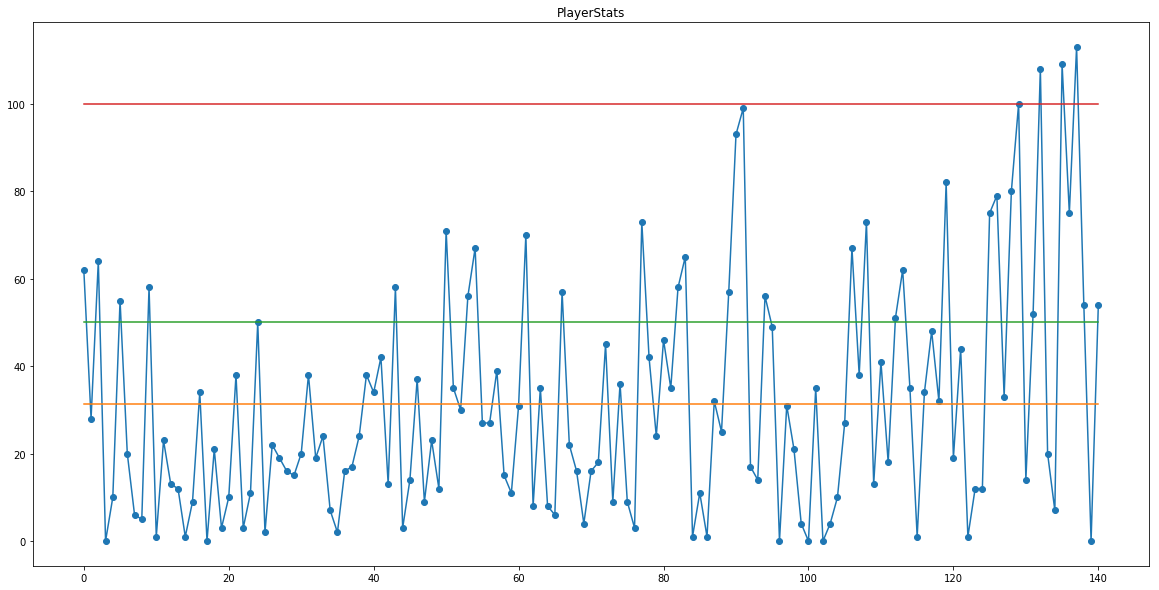

In [20]:
total_runs = 0
for i in range(len(Runs)):
    total_runs += Runs[i]
total_runs

x = np.arange(len(Player_Match_Runs))
plt.figure(figsize=(20, 10))  
plt.scatter(x,Runs)
plt.plot(Runs)
plt.title('PlayerStats')
plt.plot(x,0*x+total_runs/len(Runs))
plt.plot(x,0*x+50)
plt.plot(x,0*x+100)
plt.show()

### Find the runs scored by the player

In [21]:
total_runs = 0
k = len(Runs)
for i in range(k):
    total_runs += Runs[i]
total_runs

4418

### Strike Rate of the Batsman

In [22]:
strike_rate = total_runs/len(Player_Balls)*100
print("Strike Rate of",name,"is",strike_rate)

Strike Rate of V Kohli is 129.8266235674405


### Average of the Batsman

In [23]:
dismisal_list = list(data_set.player_dismissed)
current_player_dismisal_count = 0
for item in dismisal_list:
    if(item == name):
        current_player_dismisal_count = current_player_dismisal_count+1
print("Average of",name,"is",total_runs/current_player_dismisal_count)

Average of V Kohli is 37.440677966101696


In [24]:
attribute_player = ["Name","Runs Scored","Strike rate","Average","Century","Fifty"]
value_player = [name,total_runs,strike_rate,total_runs/current_player_dismisal_count,century,fifty]
player_consolidated = {"Attributes":attribute_player,"Values":value_player}
player_consolidated_dataframe = pd.DataFrame(player_consolidated)
player_consolidated_dataframe

,Attributes,Values
0,Name,V Kohli
1,Runs Scored,4418
2,Strike rate,129.827
3,Average,37.4407
4,Century,4
5,Fifty,30


In [25]:
from scipy import spatial

dataSetI = [0.8,0.6]
dataSetII = [0.8,0.7]
dataSetIII = [6,8]
dataset4 = [-0.8,-0.6]
datset5 = [32,24]
print(1 - spatial.distance.cosine(dataSetI, dataSetII))
print(1 - spatial.distance.cosine(dataSetI, dataSetIII))
print(1 - spatial.distance.cosine(dataSetI, dataset4))
print(1 - spatial.distance.cosine(dataSetI, datset5))

0.9971641204866131
0.9600000000000002
-1.0
1.0


## Complete Analysis of Players (Batsman)

In [128]:
def per_batsman_analysis(batsman_name,Players_Runs,  Players_SR):
    #print(batsman_name)
    Player_Match = []
    for i in range(len(Player_Runs[0:][1])):
        if(Player_Runs[0:][1][i]==batsman_name and Player_Runs[0:][3][i]==0):
            Player_Match.append([[Player_Runs[0:][0][i]],[Player_Runs[0:][1][i]],[Player_Runs[0:][2][i]],[Player_Runs[0:][6][i]]])
    per_batsman_analysis1(batsman_name,Player_Match,Players_Runs,  Players_SR)
def per_batsman_analysis1(batsman_name,Player_Match,Players_Runs,  Players_SR):
    Player_Balls = []
    for i in range(len(Player_Runs[0:][1])):
        if(Player_Runs[0:][1][i] == batsman_name and Player_Runs[0:][3][i]==0 and Player_Runs[0:][4][i]==0 ):
            Player_Balls.append([[Player_Runs[0:][0][i]],[Player_Runs[0:][1][i]],[Player_Runs[0:][2][i]]])
    per_batsman_analysis2(batsman_name,Player_Match,Player_Balls,Players_Runs,  Players_SR)
def per_batsman_analysis2(batsman_name,Player_Match,Player_Balls,Players_Runs,  Players_SR):
    count = 0
    #print(Player_Balls)
    for i in range(len(Player_Match)):
        #if(Player_Match[i][2][0]):
            count += 1
    Player_Match_Runs = []
    Runs = []
    match_no = Player_Match[0][0]
    sum = 0
    for i in range(len(Player_Match)):
        if(Player_Match[i][0] == match_no):
            sum += Player_Match[i][2][0]
        else:
            Player_Match_Runs.append([Player_Match[i-1][0],Player_Match[i-1][1],[sum],Player_Match[i-1][3]])
            Runs.append(sum)
            sum = Player_Match[i][2][0]
            match_no =  Player_Match[i][0];
    Player_Match_Runs.append([Player_Match[i-1][0],Player_Match[i-1][1],[sum],Player_Match[i-1][3]])
    Runs.append(sum)
    total_runs = 0
    k = len(Runs)
    for i in range(k):
        total_runs += Runs[i]
    #print(total_runs)
    #print(total_runs/len(Player_Balls)*100)
    player_dismisal_count = 0
    for item in dismisal_list:
        if(item == batsman_name):
            player_dismisal_count = player_dismisal_count+1
    Player_ball_faced.append(player_dismisal_count)
    Players_Runs.append(total_runs)
    Players_SR.append(total_runs/len(Player_Balls)*100)
    Players_avg.append(total_runs/player_dismisal_count)

In [129]:
Players_Runs = []
Players_SR = []
Players_avg = []
Player_ball_faced = []
count = 0
for Name_bat in player_list:
    per_batsman_analysis(Name_bat,Players_Runs,  Players_SR)
    count += 1
    #if(count>20):
        #plt.scatter(Players_Runs,Players_SR)    
        #plt.show()
    print(count)
    #print(Name_bat)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in longlong_scalars


23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44


H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in longlong_scalars


45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308

In [133]:
print(Players_Runs)

[1993, 1107, 6, 11, 98, 98, 15, 6, 1687, 4, 3626, 974, 167, 15, 2, 88, 4, 34, 1295, 91, 14, 606, 12, 26, 278, 9, 1977, 241, 2334, 181, 56, 2, 38, 1553, 12, 145, 394, 127, 3, 768, 19, 270, 531, 55, 0, 3, 18, 69, 342, 81, 94, 0, 103, 2, 4014, 11, 96, 106, 159, 5, 6, 125, 280, 3, 11, 16, 2385, 16, 384, 2, 2, 0, 326, 7, 422, 136, 2, 88, 226, 4, 0, 423, 1262, 77, 24, 39, 676, 33, 192, 521, 76, 59, 2904, 1139, 113, 280, 577, 20, 193, 36, 166, 5, 1426, 969, 25, 39, 6, 1112, 498, 1, 1802, 52, 26, 0, 974, 390, 295, 120, 2, 893, 342, 125, 87, 10, 19, 3, 46, 1557, 9, 8, 1, 90, 1732, 10, 22, 375, 35, 1349, 5, 1563, 4, 8, 0, 2215, 5, 131, 42, 46, 527, 20, 814, 420, 193, 73, 798, 4, 92, 54, 29, 6, 10, 124, 3473, 2622, 218, 92, 241, 1158, 31, 231, 41, 5, 163, 1, 67, 117, 1603, 153, 0, 33, 177, 401, 164, 725, 137, 20, 22, 140, 169, 49, 1322, 799, 237, 7, 117, 158, 62, 439, 177, 36, 1, 51, 12, 126, 2322, 128, 31, 21, 327, 368, 0, 217, 1153, 2587, 73, 259, 106, 724, 147, 515, 9, 28, 20, 117, 225, 17, 3,

In [134]:
print(Players_SR)

[124.87468671679198, 137.51552795031057, 46.15384615384615, 122.22222222222223, 83.76068376068376, 104.25531914893618, 55.55555555555556, 85.71428571428571, 121.19252873563218, 30.76923076923077, 151.209341117598, 129.86666666666667, 126.51515151515152, 53.57142857142857, 40.0, 88.88888888888889, 133.33333333333331, 100.0, 127.96442687747036, 112.34567901234568, 233.33333333333334, 128.1183932346723, 100.0, 108.33333333333333, 143.29896907216494, 75.0, 122.64267990074443, 129.56989247311827, 119.81519507186857, 126.57342657342659, 74.66666666666667, 66.66666666666666, 122.58064516129032, 118.6401833460657, 66.66666666666666, 133.0275229357798, 127.50809061488673, 127.0, 150.0, 144.36090225563908, 73.07692307692307, 116.88311688311688, 117.21854304635761, 79.71014492753623, 0.0, 60.0, 72.0, 81.17647058823529, 120.4225352112676, 119.11764705882352, 104.44444444444446, 0.0, 100.98039215686273, 25.0, 142.1388101983003, 68.75, 97.95918367346938, 176.66666666666666, 112.7659574468085, 38.461

In [135]:
print(Players_avg)

[39.86, 35.70967741935484, 6.0, 5.5, 16.333333333333332, 16.333333333333332, 7.5, 6.0, 25.953846153846154, 4.0, 40.741573033707866, 36.074074074074076, 55.666666666666664, 5.0, 2.0, 5.5, 2.0, 6.8, 30.11627906976744, 22.75, 14.0, 20.2, inf, 13.0, 23.166666666666668, 9.0, 38.76470588235294, 24.1, 33.82608695652174, 45.25, 9.333333333333334, 2.0, 7.6, 20.986486486486488, 6.0, 18.125, 28.142857142857142, 21.166666666666668, inf, 27.428571428571427, 6.333333333333333, 15.882352941176471, 29.5, 11.0, nan, 1.5, 4.5, 13.8, 11.4, 20.25, 13.428571428571429, 0.0, 14.714285714285714, 2.0, 40.14, 5.5, 13.714285714285714, 21.2, 14.454545454545455, 5.0, inf, 17.857142857142858, 18.666666666666668, 1.5, 11.0, 1.3333333333333333, 28.392857142857142, 5.333333333333333, 38.4, 2.0, 2.0, 0.0, 23.285714285714285, 7.0, 19.181818181818183, 17.0, 0.5, 44.0, 22.6, 4.0, nan, 21.15, 22.945454545454545, 12.833333333333334, 4.0, 7.8, 21.125, 8.25, 24.0, 27.42105263157895, 15.2, 29.5, 29.632653061224488, 21.49056603

### Handling NaN values in Average Calculation

In [136]:
P_avg = []
for item in Players_avg:
    if(str(item) == 'nan'):
        P_avg.append(0)
    elif(str(item)=='inf'):
        P_avg.append(0)
    else:
        P_avg.append(item)

In [137]:
print(P_avg)

[39.86, 35.70967741935484, 6.0, 5.5, 16.333333333333332, 16.333333333333332, 7.5, 6.0, 25.953846153846154, 4.0, 40.741573033707866, 36.074074074074076, 55.666666666666664, 5.0, 2.0, 5.5, 2.0, 6.8, 30.11627906976744, 22.75, 14.0, 20.2, 0, 13.0, 23.166666666666668, 9.0, 38.76470588235294, 24.1, 33.82608695652174, 45.25, 9.333333333333334, 2.0, 7.6, 20.986486486486488, 6.0, 18.125, 28.142857142857142, 21.166666666666668, 0, 27.428571428571427, 6.333333333333333, 15.882352941176471, 29.5, 11.0, 0, 1.5, 4.5, 13.8, 11.4, 20.25, 13.428571428571429, 0.0, 14.714285714285714, 2.0, 40.14, 5.5, 13.714285714285714, 21.2, 14.454545454545455, 5.0, 0, 17.857142857142858, 18.666666666666668, 1.5, 11.0, 1.3333333333333333, 28.392857142857142, 5.333333333333333, 38.4, 2.0, 2.0, 0.0, 23.285714285714285, 7.0, 19.181818181818183, 17.0, 0.5, 44.0, 22.6, 4.0, 0, 21.15, 22.945454545454545, 12.833333333333334, 4.0, 7.8, 21.125, 8.25, 24.0, 27.42105263157895, 15.2, 29.5, 29.632653061224488, 21.49056603773585, 16

### Plot of Players Runs vs Strike Rate

In [138]:
ClassA_Runs = []
ClassB_Runs = []
ClassC_Runs = []
ClassA_SR = []
ClassB_SR = []
ClassC_SR = []
for i in range(len(Players_Runs)-1):
    if(Players_Runs[i]>1500 and Players_SR[i]<130):
        ClassB_Runs.append(Players_Runs[i])
        ClassB_SR.append(Players_SR[i])
    elif(Players_Runs[i]>1500 and Players_SR[i]>130):
        ClassA_Runs.append(Players_Runs[i])
        ClassA_SR.append(Players_SR[i])
    else:
        ClassC_Runs.append(Players_Runs[i])
        ClassC_SR.append(Players_SR[i])

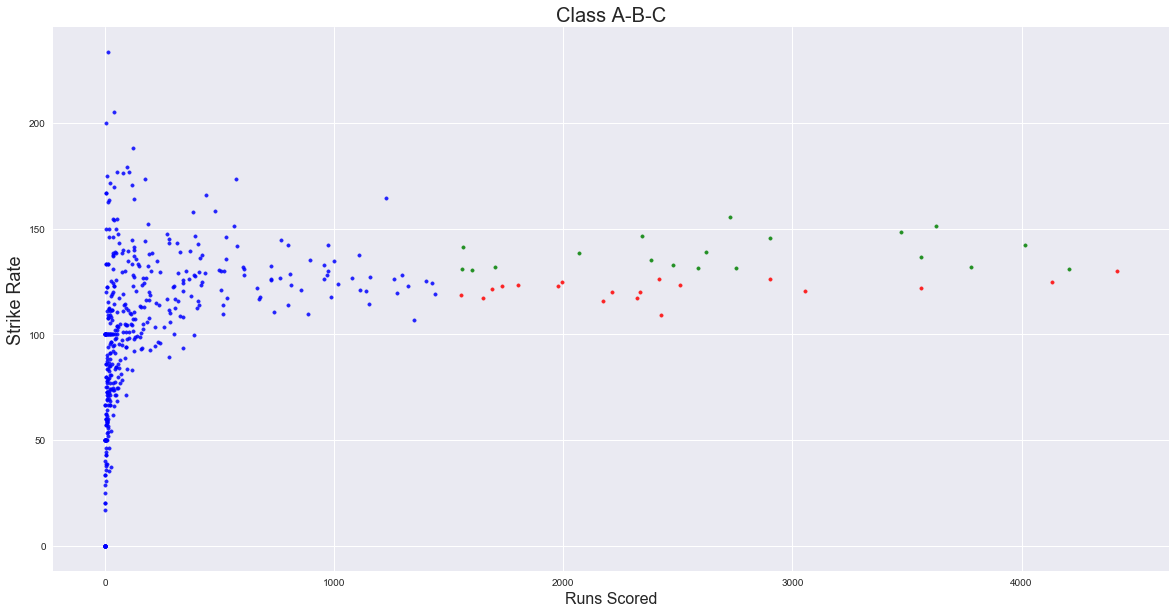

In [356]:
x = np.arange(461)
plt.figure(figsize=(20,10))
plt.title("Class A-B-C",fontsize=20)
plt.ylabel("Strike Rate",fontsize=18)
plt.xlabel("Runs Scored",fontsize=16)
plt.scatter(ClassA_Runs,ClassA_SR,marker='.',c='green',alpha=0.85) 
plt.scatter(ClassB_Runs,ClassB_SR,marker='.',c='red',alpha=0.85) 
plt.scatter(ClassC_Runs,ClassC_SR,marker='.',c='blue',alpha=0.85) 
    
plt.show()

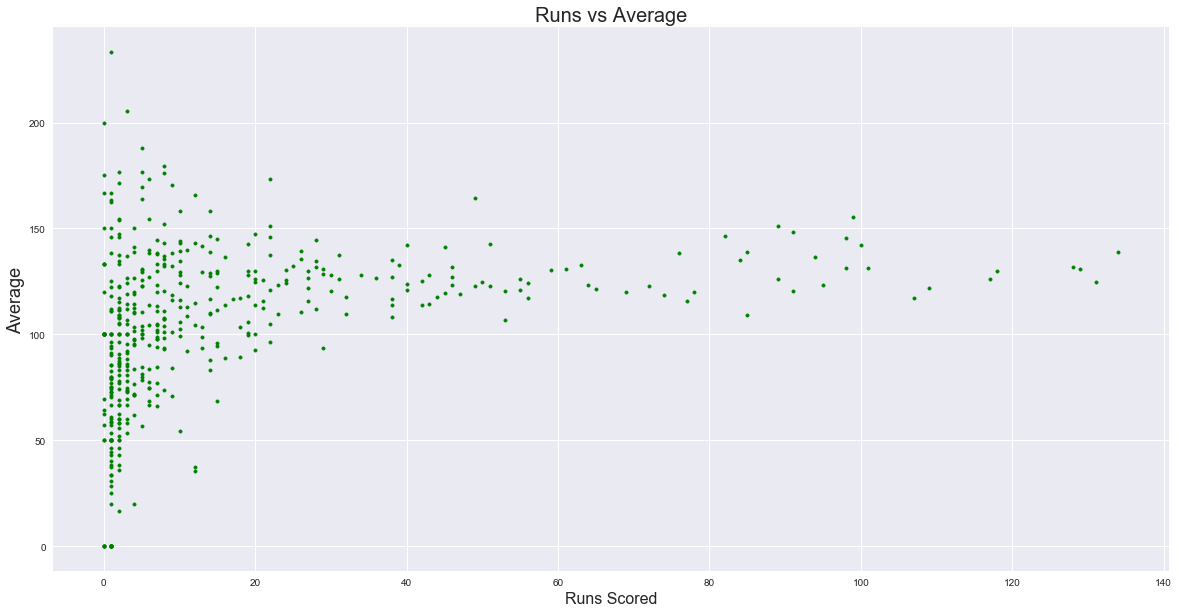

In [359]:
x = np.arange(461)
plt.figure(figsize=(20,10))
plt.title("Runs vs Average",fontsize=20)
plt.ylabel("Average",fontsize=18)
plt.xlabel("Runs Scored",fontsize=16)
plt.scatter(Player_ball_faced,Players_SR,marker='.',c='green')    
plt.show()

### Calculating the Century, Half Century , Sixes and Fours Scored by Players

In [141]:
def milestones(name):
    Player_Match = []
    four = 0
    six = 0
    for i in range(len(Player_Runs[0:][1])):
        if(Player_Runs[0:][1][i]==name and Player_Runs[0:][3][i]==0):
            Player_Match.append([[Player_Runs[0:][0][i]],[Player_Runs[0:][1][i]],[Player_Runs[0:][2][i]],[Player_Runs[0:][6][i]]])
    for i in range(len(Player_Match)):
        if(Player_Match[i][2][0]==4):
            four=four+1
        elif(Player_Match[i][2][0]==6):
            six = six+1
            
    Player_four.append(four)
    Player_six.append(six)
    
    Player_Match_Runs = []
    Runs = []
    match_no = Player_Match[0][0]
    sum = 0
    for i in range(len(Player_Match)):
        if(Player_Match[i][0] == match_no):
            sum += Player_Match[i][2][0]
        else:
            Player_Match_Runs.append([Player_Match[i-1][0],Player_Match[i-1][1],[sum],Player_Match[i-1][3]])
            Runs.append(sum)
            sum = Player_Match[i][2][0]
            match_no =  Player_Match[i][0];
    Player_Match_Runs.append([Player_Match[i-1][0],Player_Match[i-1][1],[sum],Player_Match[i-1][3]])
    Runs.append(sum)

    fifty = 0
    century = 0
    for i in range(len(Player_Match_Runs)):
        if(Player_Match_Runs[i][2][0]>=50 and Player_Match_Runs[i][2][0]<100):
            fifty = fifty+1
        elif(Player_Match_Runs[i][2][0]>=100):
            century = century+1
    Player_century.append(century)
    Player_fifty.append(fifty)

In [147]:
Player_fifty = []
Player_century = []
Player_four = []
Player_six = []
index = 1
for player in player_list:
    milestones(player)
    print(index)
    index = index+1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [148]:
print(Player_fifty)

[14, 8, 0, 0, 0, 0, 0, 0, 10, 0, 21, 5, 1, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 1, 0, 15, 2, 13, 0, 0, 0, 0, 6, 0, 1, 1, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 36, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 17, 0, 3, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 4, 0, 0, 0, 2, 0, 0, 3, 0, 0, 13, 1, 0, 0, 3, 0, 1, 0, 0, 0, 7, 5, 0, 0, 0, 5, 2, 0, 10, 0, 0, 0, 3, 1, 1, 1, 0, 3, 1, 1, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 1, 0, 7, 0, 8, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 22, 14, 0, 0, 1, 8, 0, 0, 0, 0, 1, 0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 5, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 10, 1, 0, 0, 1, 2, 0, 1, 9, 12, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 0, 6, 22, 0, 0, 0, 4, 0, 0, 0, 0, 1, 6, 14, 17, 0, 0, 0, 30, 0, 0, 0, 0, 4, 1, 0, 17, 0, 1, 0, 0, 11, 0, 1, 1, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 35, 0, 0, 1, 0, 0, 16, 4, 0, 1, 3, 0, 0, 6, 0, 0, 0, 0, 0, 0, 32, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 11, 4, 0, 0, 6,

In [149]:
print(Player_six)

[78, 44, 0, 1, 0, 0, 0, 1, 27, 0, 265, 41, 1, 0, 0, 5, 0, 1, 38, 1, 2, 28, 0, 1, 6, 0, 52, 8, 29, 3, 0, 0, 2, 79, 0, 3, 13, 3, 0, 39, 1, 6, 16, 1, 0, 0, 0, 0, 13, 0, 3, 0, 3, 0, 160, 1, 0, 3, 8, 0, 0, 1, 7, 0, 0, 0, 117, 0, 23, 0, 0, 0, 15, 0, 26, 7, 0, 1, 5, 0, 0, 10, 48, 4, 0, 2, 26, 1, 3, 30, 0, 1, 147, 37, 1, 1, 21, 0, 5, 1, 3, 0, 57, 27, 1, 5, 0, 18, 15, 0, 39, 1, 0, 0, 55, 4, 18, 2, 0, 33, 9, 2, 2, 0, 0, 0, 2, 57, 0, 0, 0, 2, 57, 0, 0, 9, 1, 42, 0, 78, 0, 1, 0, 64, 0, 3, 1, 1, 23, 1, 33, 18, 2, 1, 23, 0, 4, 3, 1, 0, 0, 10, 156, 122, 9, 2, 2, 26, 0, 2, 1, 0, 4, 0, 1, 2, 59, 4, 0, 0, 6, 18, 2, 24, 5, 0, 0, 0, 6, 3, 60, 41, 8, 0, 3, 3, 2, 23, 9, 1, 0, 2, 0, 6, 35, 8, 0, 0, 9, 18, 0, 5, 24, 141, 0, 6, 5, 29, 8, 15, 0, 0, 0, 6, 14, 0, 0, 30, 13, 3, 1, 31, 125, 1, 0, 5, 23, 0, 0, 2, 5, 26, 43, 79, 44, 2, 3, 1, 160, 2, 1, 0, 29, 40, 9, 6, 156, 1, 28, 2, 0, 28, 7, 15, 8, 1, 9, 11, 0, 1, 37, 0, 8, 9, 1, 1, 21, 0, 0, 1, 0, 2, 3, 0, 0, 0, 0, 147, 58, 8, 0, 1, 0, 16, 106, 11, 3, 12, 37, 16, 

In [150]:
print(Player_century)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [151]:
print(Player_four)

[123, 121, 1, 0, 9, 12, 0, 0, 195, 0, 294, 74, 19, 0, 0, 6, 1, 6, 110, 9, 0, 34, 1, 1, 45, 0, 198, 26, 296, 15, 2, 0, 4, 121, 0, 21, 32, 14, 0, 84, 1, 22, 39, 4, 0, 0, 3, 5, 24, 11, 8, 0, 12, 0, 401, 0, 10, 16, 11, 0, 1, 11, 28, 0, 2, 0, 245, 0, 31, 0, 0, 0, 26, 1, 23, 9, 0, 9, 23, 0, 0, 56, 102, 5, 1, 5, 55, 2, 26, 40, 6, 9, 239, 87, 7, 23, 60, 1, 21, 3, 14, 1, 112, 87, 1, 1, 0, 134, 44, 0, 200, 2, 1, 0, 61, 50, 15, 21, 0, 72, 36, 13, 7, 1, 1, 0, 4, 130, 1, 0, 0, 6, 125, 1, 1, 35, 4, 137, 0, 104, 1, 0, 0, 197, 0, 10, 3, 4, 36, 1, 82, 22, 30, 6, 93, 0, 10, 3, 3, 0, 0, 9, 287, 257, 17, 9, 26, 135, 3, 22, 3, 1, 14, 0, 6, 11, 170, 13, 0, 5, 19, 24, 15, 61, 11, 1, 0, 16, 17, 1, 90, 76, 24, 1, 6, 15, 5, 33, 12, 2, 0, 3, 2, 10, 297, 13, 3, 2, 25, 34, 0, 19, 140, 204, 9, 22, 6, 44, 12, 49, 0, 3, 0, 10, 9, 1, 0, 47, 9, 14, 1, 83, 377, 1, 0, 13, 34, 0, 3, 2, 11, 50, 122, 205, 255, 5, 27, 4, 383, 23, 1, 0, 59, 91, 32, 14, 251, 3, 24, 1, 0, 154, 13, 22, 12, 0, 20, 40, 0, 5, 77, 0, 6, 11, 0, 4, 54

In [26]:
Players_Runs = [1993, 1107, 6, 11, 98, 98, 15, 6, 1687, 4, 3626, 974, 167, 15, 2, 88, 4, 34, 1295, 91, 14, 606, 12, 26, 278, 9, 1977, 241, 2334, 181, 56, 2, 38, 1553, 12, 145, 394, 127, 3, 768, 19, 270, 531, 55, 0, 3, 18, 69, 342, 81, 94, 0, 103, 2, 4014, 11, 96, 106, 159, 5, 6, 125, 280, 3, 11, 16, 2385, 16, 384, 2, 2, 0, 326, 7, 422, 136, 2, 88, 226, 4, 0, 423, 1262, 77, 24, 39, 676, 33, 192, 521, 76, 59, 2904, 1139, 113, 280, 577, 20, 193, 36, 166, 5, 1426, 969, 25, 39, 6, 1112, 498, 1, 1802, 52, 26, 0, 974, 390, 295, 120, 2, 893, 342, 125, 87, 10, 19, 3, 46, 1557, 9, 8, 1, 90, 1732, 10, 22, 375, 35, 1349, 5, 1563, 4, 8, 0, 2215, 5, 131, 42, 46, 527, 20, 814, 420, 193, 73, 798, 4, 92, 54, 29, 6, 10, 124, 3473, 2622, 218, 92, 241, 1158, 31, 231, 41, 5, 163, 1, 67, 117, 1603, 153, 0, 33, 177, 401, 164, 725, 137, 20, 22, 140, 169, 49, 1322, 799, 237, 7, 117, 158, 62, 439, 177, 36, 1, 51, 12, 126, 2322, 128, 31, 21, 327, 368, 0, 217, 1153, 2587, 73, 259, 106, 724, 147, 515, 9, 28, 20, 117, 225, 17, 3, 564, 203, 130, 23, 886, 3778, 15, 0, 179, 506, 1, 15, 39, 111, 527, 1400, 2416, 2427, 49, 196, 36, 4418, 170, 25, 2, 766, 1001, 300, 198, 3560, 34, 406, 19, 9, 1441, 194, 316, 205, 7, 304, 339, 3, 79, 985, 10, 99, 187, 15, 34, 608, 7, 23, 42, 26, 64, 47, 3, 4, 18, 38, 2344, 4132, 124, 47, 101, 0, 405, 2728, 417, 66, 271, 574, 304, 7, 807, 11, 35, 10, 28, 14, 6, 4207, 1648, 285, 13, 319, 13, 161, 121, 3, 2, 1, 353, 1079, 437, 87, 76, 1228, 19, 954, 2903, 514, 159, 0, 121, 1, 0, 411, 340, 10, 2477, 26, 302, 663, 29, 52, 183, 4, 24, 99, 48, 4, 20, 12, 604, 7, 1, 53, 26, 18, 340, 53, 30, 6, 40, 123, 13, 23, 59, 40, 409, 0, 91, 127, 18, 1, 7, 2511, 53, 2, 4, 32, 317, 18, 12, 36, 10, 8, 1276, 373, 63, 12, 739, 2, 5, 505, 37, 95, 1017, 15, 20, 2069, 3561, 112, 19, 43, 391, 81, 2174, 280, 127, 49, 46, 21, 23, 672, 1703, 282, 8, 63, 34, 75, 1, 151, 35, 116, 14, 45, 52, 19, 3, 50, 20, 12, 81, 19, 42, 4, 388, 36, 14, 726, 480, 51, 25, 39, 5, 18, 3057, 189, 63, 126, 7, 8, 957, 3, 11, 83, 854, 2, 55, 24, 2753, 4540]

Players_SR = [124.87468671679198, 137.51552795031057, 46.15384615384615, 122.22222222222223, 83.76068376068376, 104.25531914893618, 55.55555555555556, 85.71428571428571, 121.19252873563218, 30.76923076923077, 151.209341117598, 129.86666666666667, 126.51515151515152, 53.57142857142857, 40.0, 88.88888888888889, 133.33333333333331, 100.0, 127.96442687747036, 112.34567901234568, 233.33333333333334, 128.1183932346723, 100.0, 108.33333333333333, 143.29896907216494, 75.0, 122.64267990074443, 129.56989247311827, 119.81519507186857, 126.57342657342659, 74.66666666666667, 66.66666666666666, 122.58064516129032, 118.6401833460657, 66.66666666666666, 133.0275229357798, 127.50809061488673, 127.0, 150.0, 144.36090225563908, 73.07692307692307, 116.88311688311688, 117.21854304635761, 79.71014492753623, 0.0, 60.0, 72.0, 81.17647058823529, 120.4225352112676, 119.11764705882352, 104.44444444444446, 0.0, 100.98039215686273, 25.0, 142.1388101983003, 68.75, 97.95918367346938, 176.66666666666666, 112.7659574468085, 38.46153846153847, 120.0, 97.65625, 111.55378486055776, 50.0, 61.111111111111114, 35.55555555555556, 135.20408163265304, 69.56521739130434, 158.02469135802468, 100.0, 50.0, 0.0, 138.72340425531914, 100.0, 137.45928338762215, 120.35398230088497, 20.0, 104.76190476190477, 134.52380952380955, 57.14285714285714, 0.0, 124.7787610619469, 126.32632632632632, 140.0, 68.57142857142857, 169.56521739130434, 117.56521739130434, 76.74418604651163, 107.86516853932584, 129.92518703241896, 78.35051546391753, 147.5, 145.49098196392785, 120.40169133192389, 104.62962962962963, 89.45686900958466, 141.76904176904176, 66.66666666666666, 137.85714285714286, 124.13793103448276, 105.0632911392405, 62.5, 124.43280977312392, 128.1746031746032, 125.0, 205.26315789473685, 50.0, 120.8695652173913, 130.36649214659687, 33.33333333333333, 123.25581395348837, 68.42105263157895, 74.28571428571429, 0.0, 141.98250728862973, 99.74424552429667, 122.40663900414938, 133.33333333333331, 66.66666666666666, 134.89425981873111, 125.73529411764706, 110.61946902654867, 114.4736842105263, 71.42857142857143, 79.16666666666666, 50.0, 102.22222222222221, 130.73047858942067, 90.0, 72.72727272727273, 100.0, 93.75, 122.92405961674946, 111.11111111111111, 100.0, 118.29652996845425, 145.83333333333331, 106.80918448139352, 100.0, 141.44796380090497, 200.0, 72.72727272727273, 0.0, 120.11930585683297, 62.5, 98.49624060150376, 91.30434782608695, 97.87234042553192, 135.47557840616966, 105.26315789473684, 123.33333333333334, 123.16715542521995, 119.87577639751552, 97.33333333333334, 113.67521367521367, 44.44444444444444, 93.87755102040816, 154.2857142857143, 111.53846153846155, 60.0, 58.82352941176471, 187.87878787878788, 148.1655290102389, 138.65679534637758, 94.37229437229438, 101.0989010989011, 96.01593625498009, 126.9736842105263, 119.23076923076923, 96.25, 66.12903225806451, 166.66666666666669, 123.48484848484848, 50.0, 104.6875, 82.97872340425532, 130.43124491456467, 113.33333333333333, 0.0, 137.5, 173.52941176470588, 112.64044943820224, 102.49999999999999, 125.64991334488735, 135.64356435643566, 71.42857142857143, 66.66666666666666, 99.29078014184397, 112.66666666666667, 84.48275862068965, 122.97674418604652, 142.42424242424244, 113.9423076923077, 50.0, 104.46428571428572, 100.63694267515923, 116.98113207547169, 165.66037735849056, 143.90243902439025, 73.46938775510205, 50.0, 102.0, 109.09090909090908, 136.95652173913044, 117.21352852094901, 164.1025641025641, 86.11111111111111, 80.76923076923077, 108.63787375415282, 126.02739726027397, 0.0, 103.33333333333334, 114.49851042701091, 131.1866125760649, 94.8051948051948, 103.60000000000001, 98.14814814814815, 125.91304347826086, 132.43243243243242, 113.68653421633555, 69.23076923076923, 96.55172413793103, 76.92307692307693, 144.44444444444443, 114.79591836734696, 85.0, 37.5, 151.20643431635386, 130.12820512820514, 107.43801652892562, 88.46153846153845, 109.78934324659231, 131.6376306620209, 115.38461538461537, 0.0, 116.23376623376625, 130.0771208226221, 33.33333333333333, 78.94736842105263, 73.58490566037736, 109.9009900990099, 145.98337950138506, 125.22361359570662, 126.16187989556136, 109.22592259225922, 125.64102564102564, 118.7878787878788, 138.46153846153845, 129.8266235674405, 124.08759124087592, 96.15384615384616, 50.0, 126.82119205298012, 134.72409152086138, 100.0, 92.5233644859813, 136.7127496159754, 154.54545454545453, 142.4561403508772, 111.76470588235294, 64.28571428571429, 118.8943894389439, 116.1676646706587, 142.98642533936652, 138.51351351351352, 77.77777777777779, 112.1771217712177, 124.17582417582418, 42.857142857142854, 101.28205128205127, 117.82296650717703, 58.82352941176471, 139.43661971830986, 152.03252032520325, 83.33333333333334, 130.76923076923077, 130.752688172043, 58.333333333333336, 74.19354838709677, 100.0, 37.142857142857146, 77.10843373493977, 138.23529411764704, 75.0, 80.0, 150.0, 122.58064516129032, 146.59161976235146, 124.60796139927623, 127.83505154639174, 71.21212121212122, 134.66666666666666, 0.0, 115.71428571428572, 155.44159544159544, 136.27450980392157, 88.0, 147.2826086956522, 173.41389728096678, 116.47509578544062, 175.0, 128.50318471337582, 122.22222222222223, 74.46808510638297, 83.33333333333334, 100.0, 51.85185185185185, 85.71428571428571, 130.8960796515246, 117.29537366548041, 110.03861003861005, 56.52173913043478, 129.1497975708502, 100.0, 93.6046511627907, 107.07964601769913, 100.0, 100.0, 100.0, 129.77941176470588, 126.6431924882629, 128.90855457227138, 129.8507462686567, 138.1818181818182, 164.3908969210174, 82.6086956521739, 126.35761589403972, 125.94360086767895, 109.36170212765957, 92.98245614035088, 0.0, 101.68067226890756, 16.666666666666664, 0.0, 129.24528301886792, 93.66391184573003, 38.46153846153847, 132.7438370846731, 54.166666666666664, 122.76422764227641, 121.875, 111.53846153846155, 104.0, 105.78034682080926, 133.33333333333331, 171.42857142857142, 111.23595505617978, 150.0, 80.0, 90.9090909090909, 133.33333333333331, 131.87772925764193, 87.5, 50.0, 176.66666666666666, 118.18181818181819, 46.15384615384615, 108.28025477707006, 103.921568627451, 100.0, 42.857142857142854, 153.84615384615387, 123.0, 162.5, 100.0, 103.50877192982458, 114.28571428571428, 113.9275766016713, 0.0, 71.09375, 141.11111111111111, 163.63636363636365, 100.0, 58.333333333333336, 123.39066339066338, 74.64788732394366, 100.0, 100.0, 106.66666666666667, 115.69343065693431, 112.5, 70.58823529411765, 92.3076923076923, 76.92307692307693, 88.88888888888889, 119.58762886597938, 139.17910447761196, 84.0, 133.33333333333331, 110.62874251497006, 28.57142857142857, 166.66666666666669, 120.8133971291866, 137.03703703703704, 179.24528301886792, 123.72262773722629, 93.75, 111.11111111111111, 138.39464882943145, 121.86858316221767, 109.80392156862746, 146.15384615384613, 138.70967741935485, 146.44194756554307, 176.08695652173913, 115.5154091392136, 145.0777202072539, 92.02898550724638, 84.48275862068965, 83.63636363636363, 91.30434782608695, 85.18518518518519, 116.46447140381282, 131.7092034029389, 105.61797752808988, 53.333333333333336, 95.45454545454545, 61.81818181818181, 129.31034482758622, 50.0, 98.69281045751634, 94.5945945945946, 170.58823529411765, 107.6923076923077, 77.58620689655173, 110.63829787234043, 111.76470588235294, 60.0, 98.0392156862745, 95.23809523809523, 60.0, 110.95890410958904, 86.36363636363636, 71.1864406779661, 57.14285714285714, 128.05280528052805, 120.0, 107.6923076923077, 132.24043715846994, 158.41584158415841, 100.0, 80.64516129032258, 95.1219512195122, 35.714285714285715, 100.0, 120.59171597633136, 132.16783216783216, 143.1818181818182, 140.0, 77.77777777777779, 72.72727272727273, 132.73231622746187, 50.0, 57.89473684210527, 113.69863013698631, 121.13475177304964, 20.0, 85.9375, 109.09090909090908, 131.22020972354625, 139.09313725490196]

#Players_avg = [39.86, 35.70967741935484, 6.0, 5.5, 16.333333333333332, 16.333333333333332, 7.5, 6.0, 25.953846153846154, 4.0, 40.741573033707866, 36.074074074074076, 55.666666666666664, 5.0, 2.0, 5.5, 2.0, 6.8, 30.11627906976744, 22.75, 14.0, 20.2, inf, 13.0, 23.166666666666668, 9.0, 38.76470588235294, 24.1, 33.82608695652174, 45.25, 9.333333333333334, 2.0, 7.6, 20.986486486486488, 6.0, 18.125, 28.142857142857142, 21.166666666666668, inf, 27.428571428571427, 6.333333333333333, 15.882352941176471, 29.5, 11.0, nan, 1.5, 4.5, 13.8, 11.4, 20.25, 13.428571428571429, 0.0, 14.714285714285714, 2.0, 40.14, 5.5, 13.714285714285714, 21.2, 14.454545454545455, 5.0, inf, 17.857142857142858, 18.666666666666668, 1.5, 11.0, 1.3333333333333333, 28.392857142857142, 5.333333333333333, 38.4, 2.0, 2.0, 0.0, 23.285714285714285, 7.0, 19.181818181818183, 17.0, 0.5, 44.0, 22.6, 4.0, nan, 21.15, 22.945454545454545, 12.833333333333334, 4.0, 7.8, 21.125, 8.25, 24.0, 27.42105263157895, 15.2, 29.5, 29.632653061224488, 21.49056603773585, 16.142857142857142, 15.555555555555555, 44.38461538461539, 3.3333333333333335, 27.571428571428573, 12.0, 7.545454545454546, 2.5, 25.464285714285715, 28.5, 25.0, 13.0, 6.0, 20.21818181818182, 20.75, 1.0, 28.15625, 3.466666666666667, 26.0, 0.0, 24.35, 20.526315789473685, 19.666666666666668, 17.142857142857142, 1.0, 23.5, 16.285714285714285, 25.0, 21.75, 10.0, 19.0, 3.0, 6.571428571428571, 25.524590163934427, 9.0, 8.0, inf, 11.25, 24.055555555555557, 10.0, 7.333333333333333, 19.736842105263158, 17.5, 25.452830188679247, 5.0, 34.733333333333334, inf, 2.6666666666666665, 0.0, 28.397435897435898, inf, 18.714285714285715, 14.0, 11.5, 20.26923076923077, 10.0, 17.695652173913043, 18.26086956521739, 27.571428571428573, 18.25, 21.0, 4.0, 13.142857142857142, 9.0, 14.5, 3.0, 10.0, 24.8, 38.16483516483517, 30.847058823529412, 14.533333333333333, 11.5, 16.066666666666666, 25.17391304347826, 10.333333333333334, 10.5, 5.857142857142857, 5.0, 23.285714285714285, 1.0, 22.333333333333332, 8.357142857142858, 27.16949152542373, 21.857142857142858, 0.0, 16.5, 29.5, 19.095238095238095, 16.4, 30.208333333333332, 17.125, 5.0, 7.333333333333333, 14.0, 16.9, 7.0, 26.979591836734695, 15.666666666666666, 14.8125, 7.0, 9.75, 8.31578947368421, 31.0, 36.583333333333336, 17.7, 4.5, 1.0, 10.2, 6.0, 15.75, 21.700934579439252, 25.6, 15.5, 10.5, 29.727272727272727, 18.4, nan, 16.692307692307693, 26.813953488372093, 25.613861386138613, 18.25, 14.38888888888889, 13.25, 23.35483870967742, 18.375, 12.261904761904763, inf, 28.0, 10.0, 16.714285714285715, 18.75, 8.5, 3.0, 25.636363636363637, 40.6, 16.25, 7.666666666666667, 27.6875, 29.515625, 7.5, 0.0, 17.9, 33.733333333333334, 1.0, 15.0, 13.0, 27.75, 23.954545454545453, 33.333333333333336, 27.146067415730336, 28.55294117647059, 9.8, 21.77777777777778, 36.0, 37.440677966101696, 17.0, 12.5, 2.0, 20.157894736842106, 35.75, 15.0, 9.9, 37.87234042553192, 17.0, 21.36842105263158, 6.333333333333333, inf, 30.659574468085108, 21.555555555555557, 31.6, 29.285714285714285, 3.5, 10.857142857142858, 14.125, 3.0, 8.777777777777779, 22.386363636363637, 10.0, 9.9, 23.375, 5.0, 6.8, 20.96551724137931, 3.5, 11.5, 21.0, 2.1666666666666665, 9.142857142857142, 5.222222222222222, 3.0, 4.0, 4.5, 19.0, 28.585365853658537, 31.541984732824428, 12.4, 11.75, 50.5, nan, 15.0, 27.555555555555557, 26.0625, 4.714285714285714, 13.55, 26.09090909090909, 21.714285714285715, inf, 27.82758620689655, 11.0, 11.666666666666666, 5.0, inf, 7.0, 6.0, 32.6124031007752, 29.428571428571427, 20.357142857142858, 2.6, 21.266666666666666, 6.5, 12.384615384615385, 15.125, 3.0, inf, inf, 17.65, 39.96296296296296, 31.214285714285715, 12.428571428571429, 12.666666666666666, 25.06122448979592, 19.0, 26.5, 24.811965811965813, 22.347826086956523, 19.875, 0.0, 30.25, 0.5, 0.0, 31.615384615384617, 11.724137931034482, 5.0, 39.317460317460316, 2.6, 27.454545454545453, 24.555555555555557, 14.5, 6.5, 18.3, inf, 12.0, 14.142857142857142, 48.0, 4.0, 10.0, inf, 21.571428571428573, 3.5, inf, 26.5, 26.0, 9.0, 8.947368421052632, 10.6, 10.0, 3.0, 20.0, 24.6, 13.0, 7.666666666666667, 14.75, 13.333333333333334, 20.45, 0.0, 10.11111111111111, 31.75, 18.0, inf, 3.5, 26.431578947368422, 8.833333333333334, inf, inf, 10.666666666666666, 15.095238095238095, 9.0, 12.0, 12.0, 10.0, 4.0, 28.355555555555554, 14.346153846153847, 7.0, inf, 28.423076923076923, 2.0, inf, 22.954545454545453, 12.333333333333334, 11.875, 25.425, 15.0, 20.0, 27.223684210526315, 32.669724770642205, 8.0, 19.0, 10.75, 27.928571428571427, 10.125, 28.233766233766232, 18.666666666666668, 11.545454545454545, 9.8, 11.5, 21.0, 7.666666666666667, 17.68421052631579, 37.02173913043478, 14.842105263157896, 8.0, 15.75, 8.5, 15.0, inf, 11.615384615384615, 35.0, 12.88888888888889, 7.0, 7.5, 13.0, 19.0, 3.0, 10.0, 6.666666666666667, 4.0, 10.125, 9.5, 6.0, inf, 20.42105263157895, 9.0, 7.0, 29.04, 34.285714285714285, 10.2, 8.333333333333334, 6.5, 2.5, 9.0, 33.59340659340659, 21.0, 7.875, 11.454545454545455, 2.3333333333333335, 8.0, 24.53846153846154, 1.5, 3.6666666666666665, 13.833333333333334, 21.35, 2.0, 18.333333333333332, 12.0, 28.091836734693878, 33.88059701492537]

P_avg = [39.86, 35.70967741935484, 6.0, 5.5, 16.333333333333332, 16.333333333333332, 7.5, 6.0, 25.953846153846154, 4.0, 40.741573033707866, 36.074074074074076, 55.666666666666664, 5.0, 2.0, 5.5, 2.0, 6.8, 30.11627906976744, 22.75, 14.0, 20.2, 0, 13.0, 23.166666666666668, 9.0, 38.76470588235294, 24.1, 33.82608695652174, 45.25, 9.333333333333334, 2.0, 7.6, 20.986486486486488, 6.0, 18.125, 28.142857142857142, 21.166666666666668, 0, 27.428571428571427, 6.333333333333333, 15.882352941176471, 29.5, 11.0, 0, 1.5, 4.5, 13.8, 11.4, 20.25, 13.428571428571429, 0.0, 14.714285714285714, 2.0, 40.14, 5.5, 13.714285714285714, 21.2, 14.454545454545455, 5.0, 0, 17.857142857142858, 18.666666666666668, 1.5, 11.0, 1.3333333333333333, 28.392857142857142, 5.333333333333333, 38.4, 2.0, 2.0, 0.0, 23.285714285714285, 7.0, 19.181818181818183, 17.0, 0.5, 44.0, 22.6, 4.0, 0, 21.15, 22.945454545454545, 12.833333333333334, 4.0, 7.8, 21.125, 8.25, 24.0, 27.42105263157895, 15.2, 29.5, 29.632653061224488, 21.49056603773585, 16.142857142857142, 15.555555555555555, 44.38461538461539, 3.3333333333333335, 27.571428571428573, 12.0, 7.545454545454546, 2.5, 25.464285714285715, 28.5, 25.0, 13.0, 6.0, 20.21818181818182, 20.75, 1.0, 28.15625, 3.466666666666667, 26.0, 0.0, 24.35, 20.526315789473685, 19.666666666666668, 17.142857142857142, 1.0, 23.5, 16.285714285714285, 25.0, 21.75, 10.0, 19.0, 3.0, 6.571428571428571, 25.524590163934427, 9.0, 8.0, 0, 11.25, 24.055555555555557, 10.0, 7.333333333333333, 19.736842105263158, 17.5, 25.452830188679247, 5.0, 34.733333333333334, 0, 2.6666666666666665, 0.0, 28.397435897435898, 0, 18.714285714285715, 14.0, 11.5, 20.26923076923077, 10.0, 17.695652173913043, 18.26086956521739, 27.571428571428573, 18.25, 21.0, 4.0, 13.142857142857142, 9.0, 14.5, 3.0, 10.0, 24.8, 38.16483516483517, 30.847058823529412, 14.533333333333333, 11.5, 16.066666666666666, 25.17391304347826, 10.333333333333334, 10.5, 5.857142857142857, 5.0, 23.285714285714285, 1.0, 22.333333333333332, 8.357142857142858, 27.16949152542373, 21.857142857142858, 0.0, 16.5, 29.5, 19.095238095238095, 16.4, 30.208333333333332, 17.125, 5.0, 7.333333333333333, 14.0, 16.9, 7.0, 26.979591836734695, 15.666666666666666, 14.8125, 7.0, 9.75, 8.31578947368421, 31.0, 36.583333333333336, 17.7, 4.5, 1.0, 10.2, 6.0, 15.75, 21.700934579439252, 25.6, 15.5, 10.5, 29.727272727272727, 18.4, 0, 16.692307692307693, 26.813953488372093, 25.613861386138613, 18.25, 14.38888888888889, 13.25, 23.35483870967742, 18.375, 12.261904761904763, 0, 28.0, 10.0, 16.714285714285715, 18.75, 8.5, 3.0, 25.636363636363637, 40.6, 16.25, 7.666666666666667, 27.6875, 29.515625, 7.5, 0.0, 17.9, 33.733333333333334, 1.0, 15.0, 13.0, 27.75, 23.954545454545453, 33.333333333333336, 27.146067415730336, 28.55294117647059, 9.8, 21.77777777777778, 36.0, 37.440677966101696, 17.0, 12.5, 2.0, 20.157894736842106, 35.75, 15.0, 9.9, 37.87234042553192, 17.0, 21.36842105263158, 6.333333333333333, 0, 30.659574468085108, 21.555555555555557, 31.6, 29.285714285714285, 3.5, 10.857142857142858, 14.125, 3.0, 8.777777777777779, 22.386363636363637, 10.0, 9.9, 23.375, 5.0, 6.8, 20.96551724137931, 3.5, 11.5, 21.0, 2.1666666666666665, 9.142857142857142, 5.222222222222222, 3.0, 4.0, 4.5, 19.0, 28.585365853658537, 31.541984732824428, 12.4, 11.75, 50.5, 0, 15.0, 27.555555555555557, 26.0625, 4.714285714285714, 13.55, 26.09090909090909, 21.714285714285715, 0, 27.82758620689655, 11.0, 11.666666666666666, 5.0, 0, 7.0, 6.0, 32.6124031007752, 29.428571428571427, 20.357142857142858, 2.6, 21.266666666666666, 6.5, 12.384615384615385, 15.125, 3.0, 0, 0, 17.65, 39.96296296296296, 31.214285714285715, 12.428571428571429, 12.666666666666666, 25.06122448979592, 19.0, 26.5, 24.811965811965813, 22.347826086956523, 19.875, 0.0, 30.25, 0.5, 0.0, 31.615384615384617, 11.724137931034482, 5.0, 39.317460317460316, 2.6, 27.454545454545453, 24.555555555555557, 14.5, 6.5, 18.3, 0, 12.0, 14.142857142857142, 48.0, 4.0, 10.0, 0, 21.571428571428573, 3.5, 0, 26.5, 26.0, 9.0, 8.947368421052632, 10.6, 10.0, 3.0, 20.0, 24.6, 13.0, 7.666666666666667, 14.75, 13.333333333333334, 20.45, 0.0, 10.11111111111111, 31.75, 18.0, 0, 3.5, 26.431578947368422, 8.833333333333334, 0, 0, 10.666666666666666, 15.095238095238095, 9.0, 12.0, 12.0, 10.0, 4.0, 28.355555555555554, 14.346153846153847, 7.0, 0, 28.423076923076923, 2.0, 0, 22.954545454545453, 12.333333333333334, 11.875, 25.425, 15.0, 20.0, 27.223684210526315, 32.669724770642205, 8.0, 19.0, 10.75, 27.928571428571427, 10.125, 28.233766233766232, 18.666666666666668, 11.545454545454545, 9.8, 11.5, 21.0, 7.666666666666667, 17.68421052631579, 37.02173913043478, 14.842105263157896, 8.0, 15.75, 8.5, 15.0, 0, 11.615384615384615, 35.0, 12.88888888888889, 7.0, 7.5, 13.0, 19.0, 3.0, 10.0, 6.666666666666667, 4.0, 10.125, 9.5, 6.0, 0, 20.42105263157895, 9.0, 7.0, 29.04, 34.285714285714285, 10.2, 8.333333333333334, 6.5, 2.5, 9.0, 33.59340659340659, 21.0, 7.875, 11.454545454545455, 2.3333333333333335, 8.0, 24.53846153846154, 1.5, 3.6666666666666665, 13.833333333333334, 21.35, 2.0, 18.333333333333332, 12.0, 28.091836734693878, 33.88059701492537]

Player_fifty = [14, 8, 0, 0, 0, 0, 0, 0, 10, 0, 21, 5, 1, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 1, 0, 15, 2, 13, 0, 0, 0, 0, 6, 0, 1, 1, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 36, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 17, 0, 3, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 4, 0, 0, 0, 2, 0, 0, 3, 0, 0, 13, 1, 0, 0, 3, 0, 1, 0, 0, 0, 7, 5, 0, 0, 0, 5, 2, 0, 10, 0, 0, 0, 3, 1, 1, 1, 0, 3, 1, 1, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 1, 0, 7, 0, 8, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 22, 14, 0, 0, 1, 8, 0, 0, 0, 0, 1, 0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 5, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 10, 1, 0, 0, 1, 2, 0, 1, 9, 12, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 0, 6, 22, 0, 0, 0, 4, 0, 0, 0, 0, 1, 6, 14, 17, 0, 0, 0, 30, 0, 0, 0, 0, 4, 1, 0, 17, 0, 1, 0, 0, 11, 0, 1, 1, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 35, 0, 0, 1, 0, 0, 16, 4, 0, 1, 3, 0, 0, 6, 0, 0, 0, 0, 0, 0, 32, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 11, 4, 0, 0, 6, 0, 6, 14, 0, 1, 0, 1, 0, 0, 3, 0, 0, 20, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 1, 0, 0, 4, 0, 0, 2, 0, 0, 3, 0, 0, 11, 28, 0, 0, 0, 2, 0, 11, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 5, 1, 0, 0, 0, 0, 0, 25, 1, 0, 0, 0, 0, 3, 0, 0, 1, 4, 0, 0, 0, 13, 31]

Player_six = [78, 44, 0, 1, 0, 0, 0, 1, 27, 0, 265, 41, 1, 0, 0, 5, 0, 1, 38, 1, 2, 28, 0, 1, 6, 0, 52, 8, 29, 3, 0, 0, 2, 79, 0, 3, 13, 3, 0, 39, 1, 6, 16, 1, 0, 0, 0, 0, 13, 0, 3, 0, 3, 0, 160, 1, 0, 3, 8, 0, 0, 1, 7, 0, 0, 0, 117, 0, 23, 0, 0, 0, 15, 0, 26, 7, 0, 1, 5, 0, 0, 10, 48, 4, 0, 2, 26, 1, 3, 30, 0, 1, 147, 37, 1, 1, 21, 0, 5, 1, 3, 0, 57, 27, 1, 5, 0, 18, 15, 0, 39, 1, 0, 0, 55, 4, 18, 2, 0, 33, 9, 2, 2, 0, 0, 0, 2, 57, 0, 0, 0, 2, 57, 0, 0, 9, 1, 42, 0, 78, 0, 1, 0, 64, 0, 3, 1, 1, 23, 1, 33, 18, 2, 1, 23, 0, 4, 3, 1, 0, 0, 10, 156, 122, 9, 2, 2, 26, 0, 2, 1, 0, 4, 0, 1, 2, 59, 4, 0, 0, 6, 18, 2, 24, 5, 0, 0, 0, 6, 3, 60, 41, 8, 0, 3, 3, 2, 23, 9, 1, 0, 2, 0, 6, 35, 8, 0, 0, 9, 18, 0, 5, 24, 141, 0, 6, 5, 29, 8, 15, 0, 0, 0, 6, 14, 0, 0, 30, 13, 3, 1, 31, 125, 1, 0, 5, 23, 0, 0, 2, 5, 26, 43, 79, 44, 2, 3, 1, 160, 2, 1, 0, 29, 40, 9, 6, 156, 1, 28, 2, 0, 28, 7, 15, 8, 1, 9, 11, 0, 1, 37, 0, 8, 9, 1, 1, 21, 0, 0, 1, 0, 2, 3, 0, 0, 0, 0, 147, 58, 8, 0, 1, 0, 16, 106, 11, 3, 12, 37, 16, 0, 32, 0, 0, 0, 1, 0, 0, 173, 39, 9, 0, 13, 0, 7, 2, 0, 0, 0, 16, 44, 25, 4, 5, 82, 0, 36, 71, 10, 1, 0, 1, 0, 0, 11, 5, 0, 78, 0, 13, 19, 0, 4, 1, 0, 2, 2, 2, 0, 0, 1, 19, 0, 0, 3, 1, 0, 17, 3, 0, 0, 1, 4, 1, 0, 0, 0, 5, 0, 2, 4, 1, 0, 0, 89, 0, 0, 0, 1, 14, 1, 0, 1, 0, 1, 45, 20, 1, 0, 9, 0, 0, 20, 0, 8, 46, 0, 1, 92, 71, 4, 1, 1, 17, 6, 28, 15, 5, 0, 2, 1, 0, 20, 45, 5, 0, 1, 0, 2, 0, 7, 0, 8, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 1, 0, 13, 2, 0, 21, 20, 1, 0, 0, 0, 0, 60, 8, 6, 5, 0, 0, 35, 0, 1, 4, 34, 0, 1, 1, 124, 173]

Player_century = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1]

Player_four = [123, 121, 1, 0, 9, 12, 0, 0, 195, 0, 294, 74, 19, 0, 0, 6, 1, 6, 110, 9, 0, 34, 1, 1, 45, 0, 198, 26, 296, 15, 2, 0, 4, 121, 0, 21, 32, 14, 0, 84, 1, 22, 39, 4, 0, 0, 3, 5, 24, 11, 8, 0, 12, 0, 401, 0, 10, 16, 11, 0, 1, 11, 28, 0, 2, 0, 245, 0, 31, 0, 0, 0, 26, 1, 23, 9, 0, 9, 23, 0, 0, 56, 102, 5, 1, 5, 55, 2, 26, 40, 6, 9, 239, 87, 7, 23, 60, 1, 21, 3, 14, 1, 112, 87, 1, 1, 0, 134, 44, 0, 200, 2, 1, 0, 61, 50, 15, 21, 0, 72, 36, 13, 7, 1, 1, 0, 4, 130, 1, 0, 0, 6, 125, 1, 1, 35, 4, 137, 0, 104, 1, 0, 0, 197, 0, 10, 3, 4, 36, 1, 82, 22, 30, 6, 93, 0, 10, 3, 3, 0, 0, 9, 287, 257, 17, 9, 26, 135, 3, 22, 3, 1, 14, 0, 6, 11, 170, 13, 0, 5, 19, 24, 15, 61, 11, 1, 0, 16, 17, 1, 90, 76, 24, 1, 6, 15, 5, 33, 12, 2, 0, 3, 2, 10, 297, 13, 3, 2, 25, 34, 0, 19, 140, 204, 9, 22, 6, 44, 12, 49, 0, 3, 0, 10, 9, 1, 0, 47, 9, 14, 1, 83, 377, 1, 0, 13, 34, 0, 3, 2, 11, 50, 122, 205, 255, 5, 27, 4, 383, 23, 1, 0, 59, 91, 32, 14, 251, 3, 24, 1, 0, 154, 13, 22, 12, 0, 20, 40, 0, 5, 77, 0, 6, 11, 0, 4, 54, 0, 1, 5, 1, 7, 2, 0, 1, 3, 5, 157, 484, 8, 5, 12, 0, 33, 334, 49, 5, 36, 48, 23, 1, 79, 1, 3, 1, 1, 1, 1, 354, 152, 20, 0, 34, 1, 9, 11, 0, 0, 0, 26, 109, 31, 7, 5, 96, 2, 76, 286, 43, 14, 0, 14, 0, 0, 35, 27, 0, 266, 2, 25, 59, 4, 3, 22, 0, 2, 10, 4, 0, 2, 0, 69, 1, 0, 4, 0, 1, 22, 3, 3, 0, 5, 9, 0, 5, 7, 7, 39, 0, 5, 12, 2, 0, 0, 237, 7, 0, 0, 3, 18, 1, 1, 2, 0, 0, 93, 20, 4, 1, 94, 0, 1, 61, 6, 8, 66, 1, 1, 239, 401, 8, 1, 6, 43, 7, 269, 16, 4, 9, 2, 1, 0, 55, 150, 33, 0, 6, 6, 9, 0, 8, 3, 9, 3, 3, 5, 3, 0, 5, 4, 0, 2, 1, 3, 0, 39, 1, 2, 90, 46, 4, 4, 5, 0, 3, 320, 20, 2, 11, 1, 0, 95, 0, 0, 10, 72, 0, 5, 2, 277, 402]

### Display the Data in Tabular Format

In [27]:
class ListTable(list):
    def _repr_html_(self):
        html = ["<table width=100%>"]
        row_count = 0
        
        for row in self:
            row_count = row_count + 1
            
            if(row_count == 1):
                html.append("<tr>")
                
                for col in row:
                    html.append("<th align = 'center'>{0}</th>".format(col))
                
                html.append("</tr>")
            
            else:
                html.append("<tr>")
                col_count = 0
                
                for col in row:
                    if(col_count == 0):
                        html.append("<th>{0}</th>".format(col))
                    else:
                        html.append("<td>{0}</td>".format(col))
                        
                    col_count = col_count + 1
                html.append("</tr>")
        
        html.append("</table>")
        return ''.join(html)

### Table with Name, Runs, Average, Strike Rate, Fifty, Century, Four, Sixes

In [28]:
analysis_condition = ListTable()

analysis_condition.append(['Name', 'Runs', 'Average', 'Strike rate','Fifty', 'Century', 'Fours','Sixes'])
for i in range(len(player_list)):
    analysis_condition.append([player_list[i], Players_Runs[i], P_avg[i], Players_SR[i],Player_fifty[i], Player_century[i], Player_four[i],Player_six[i]])
analysis_condition

Name,Runs,Average,Strike rate,Fifty,Century,Fours,Sixes
JP Duminy,1993,39.86,124.87468671679198,14,0,123,78
ML Hayden,1107,35.70967741935484,137.51552795031057,8,0,121,44
AS Rajpoot,6,6.0,46.15384615384615,0,0,1,0
Rashid Khan,11,5.5,122.22222222222223,0,0,0,1
CJ Ferguson,98,16.333333333333332,83.76068376068376,0,0,9,0
MJ Clarke,98,16.333333333333332,104.25531914893618,0,0,12,0
VY Mahesh,15,7.5,55.55555555555556,0,0,0,0
BA Bhatt,6,6.0,85.71428571428571,0,0,0,1
KC Sangakkara,1687,25.953846153846154,121.19252873563218,10,0,195,27
DP Nannes,4,4.0,30.76923076923077,0,0,0,0


## Correlation Analysis

### Making Data Dictionary for All players

In [29]:
batsman_details = {"Name":player_list,"Runs":Players_Runs, "Strike Rate":Players_SR ,"Average":P_avg,"Century": Player_century,"Fifty": Player_fifty,"Six": Player_six,"Four": Player_four}
batsman_details_dataframe = pd.DataFrame(batsman_details)
batsman_details_dataframe.corr()

,Average,Century,Fifty,Four,Runs,Six,Strike Rate
Average,1.000000,0.376923,0.535704,0.567525,0.585589,0.544384,0.595474
Century,0.376923,1.000000,0.612013,0.597991,0.618807,0.703608,0.189443
Fifty,0.535704,0.612013,1.000000,0.957205,0.954166,0.851429,0.261085
Four,0.567525,0.597991,0.957205,1.000000,0.981999,0.853202,0.305469
Runs,0.585589,0.618807,0.954166,0.981999,1.000000,0.919069,0.320494
Six,0.544384,0.703608,0.851429,0.853202,0.919069,1.000000,0.336450
Strike Rate,0.595474,0.189443,0.261085,0.305469,0.320494,0.336450,1.000000


In [30]:
batsman_details_dataframe

,Average,Century,Fifty,Four,Name,Runs,Six,Strike Rate
0,39.860000,0,14,123,JP Duminy,1993,78,124.874687
1,35.709677,0,8,121,ML Hayden,1107,44,137.515528
2,6.000000,0,0,1,AS Rajpoot,6,0,46.153846
3,5.500000,0,0,0,Rashid Khan,11,1,122.222222
4,16.333333,0,0,9,CJ Ferguson,98,0,83.760684
5,16.333333,0,0,12,MJ Clarke,98,0,104.255319
6,7.500000,0,0,0,VY Mahesh,15,0,55.555556
7,6.000000,0,0,0,BA Bhatt,6,1,85.714286
8,25.953846,0,10,195,KC Sangakkara,1687,27,121.192529
9,4.000000,0,0,0,DP Nannes,4,0,30.769231


### Clustering the Player based of StrikeRate and Runs Scored

In [31]:
ClassA_name,ClassB_name,ClassC_name = [],[],[]
ClassA_Runs,ClassB_Runs,ClassC_Runs = [],[],[]
ClassA_SR,ClassB_SR,ClassC_SR = [],[],[]
ClassA_avg,ClassB_avg,ClassC_avg = [],[],[]
ClassA_cent,ClassB_cent,ClassC_cent = [],[],[]
ClassA_fifty,ClassB_fifty,ClassC_fifty = [],[],[]
ClassA_six,ClassB_six,ClassC_six = [],[],[]
ClassA_four,ClassB_four,ClassC_four = [],[],[]

for i in range(len(Players_Runs)-1):
    if(Players_Runs[i]>1500 and Players_SR[i]<130):
        ClassB_name.append(player_list[i])
        ClassB_Runs.append(Players_Runs[i])
        ClassB_SR.append(Players_SR[i])
        ClassB_avg.append(P_avg[i])
        ClassB_cent.append(Player_century[i])
        ClassB_fifty.append(Player_fifty[i])
        ClassB_six.append(Player_six[i])
        ClassB_four.append(Player_four[i])
    elif(Players_Runs[i]>1500 and Players_SR[i]>130):
        ClassA_name.append(player_list[i])
        ClassA_Runs.append(Players_Runs[i])
        ClassA_SR.append(Players_SR[i])
        ClassA_avg.append(P_avg[i])
        ClassA_cent.append(Player_century[i])
        ClassA_fifty.append(Player_fifty[i])
        ClassA_six.append(Player_six[i])
        ClassA_four.append(Player_four[i])
    else:
        ClassC_name.append(player_list[i])
        ClassC_Runs.append(Players_Runs[i])
        ClassC_SR.append(Players_SR[i])
        ClassC_avg.append(P_avg[i])
        ClassC_cent.append(Player_century[i])
        ClassC_fifty.append(Player_fifty[i])
        ClassC_six.append(Player_six[i])
        ClassC_four.append(Player_four[i])

### Making Data Dictionary for Class A player (More Runs and High Strike rate)

In [32]:
batsman_dict_A = {"Name":ClassA_name,"Runs":ClassA_Runs, "Strike Rate":ClassA_SR ,"Average":ClassA_avg,"Century": ClassA_cent,"Fifty": ClassA_fifty,"Six": ClassA_six,"Four": ClassA_four}
batsman_dataframe_A = pd.DataFrame(batsman_dict_A)
batsman_dataframe_A

,Average,Century,Fifty,Four,Name,Runs,Six,Strike Rate
0,40.741573,5,21,294,CH Gayle,3626,265,151.209341
1,40.140000,3,36,401,DA Warner,4014,160,142.138810
2,28.392857,0,17,245,DR Smith,2385,117,135.204082
3,29.632653,1,13,239,YK Pathan,2904,147,145.490982
4,25.524590,1,6,130,WP Saha,1557,57,130.730479
5,34.733333,1,8,104,DA Miller,1563,78,141.447964
6,38.164835,3,22,287,AB de Villiers,3473,156,148.165529
7,30.847059,2,14,257,SR Watson,2622,122,138.656795
8,27.169492,0,13,170,AJ Finch,1603,59,130.431245
9,25.613861,0,12,204,Yuvraj Singh,2587,141,131.186613


### Correlation Matrix for Class A Players

In [33]:
batsman_dataframe_A.corr()

,Average,Century,Fifty,Four,Runs,Six,Strike Rate
Average,1.000000,0.502680,0.469557,0.277737,0.436654,0.377328,0.256072
Century,0.502680,1.000000,0.329552,0.380185,0.343764,0.525647,0.566521
Fifty,0.469557,0.329552,1.000000,0.856935,0.864320,0.581754,0.137611
Four,0.277737,0.380185,0.856935,1.000000,0.867993,0.531737,0.194929
Runs,0.436654,0.343764,0.864320,0.867993,1.000000,0.781292,0.223305
Six,0.377328,0.525647,0.581754,0.531737,0.781292,1.000000,0.475118
Strike Rate,0.256072,0.566521,0.137611,0.194929,0.223305,0.475118,1.000000


### Making Data Dictionary for Class B players (More Runs and Low Strike rate)

In [34]:
batsman_dict_B = {"Name":ClassB_name,"Runs":ClassB_Runs, "Strike Rate":ClassB_SR ,"Average":ClassB_avg,"Century": ClassB_cent,"Fifty": ClassB_fifty,"Six": ClassB_six,"Four": ClassB_four}
batsman_dataframe_B = pd.DataFrame(batsman_dict_B)
batsman_dataframe_B

,Average,Century,Fifty,Four,Name,Runs,Six,Strike Rate
0,39.860000,0,14,123,JP Duminy,1993,78,124.874687
1,25.953846,0,10,195,KC Sangakkara,1687,27,121.192529
2,38.764706,1,15,198,MEK Hussey,1977,52,122.642680
3,33.826087,1,13,296,SR Tendulkar,2334,29,119.815195
4,20.986486,0,6,121,NV Ojha,1553,79,118.640183
5,28.156250,1,10,200,DPMD Jayawardene,1802,39,123.255814
6,24.055556,0,0,125,RA Jadeja,1732,57,122.924060
7,28.397436,1,9,197,MK Pandey,2215,64,120.119306
8,21.700935,0,10,297,PA Patel,2322,35,117.213529
9,27.146067,0,14,205,AT Rayudu,2416,79,126.161880


### Correlation Matrix for Class B Players

In [35]:
batsman_dataframe_B.corr()

,Average,Century,Fifty,Four,Runs,Six,Strike Rate
Average,1.000000,0.407470,0.546154,0.247848,0.377414,0.289301,0.315933
Century,0.407470,1.000000,0.341871,0.258795,0.463352,0.693932,0.452694
Fifty,0.546154,0.341871,1.000000,0.872121,0.916141,0.423440,0.314377
Four,0.247848,0.258795,0.872121,1.000000,0.901814,0.202608,0.172805
Runs,0.377414,0.463352,0.916141,0.901814,1.000000,0.579498,0.421043
Six,0.289301,0.693932,0.423440,0.202608,0.579498,1.000000,0.639518
Strike Rate,0.315933,0.452694,0.314377,0.172805,0.421043,0.639518,1.000000


### Making Data Dictionary for Class C player (Less Runs)

In [36]:
batsman_dict_C = {"Name":ClassC_name,"Runs":ClassC_Runs, "Strike Rate":ClassC_SR ,"Average":ClassC_avg,"Century": ClassC_cent,"Fifty": ClassC_fifty,"Six": ClassC_six,"Four": ClassC_four}
batsman_dataframe_C = pd.DataFrame(batsman_dict_C)
batsman_dataframe_C

,Average,Century,Fifty,Four,Name,Runs,Six,Strike Rate
0,35.709677,0,8,121,ML Hayden,1107,44,137.515528
1,6.000000,0,0,1,AS Rajpoot,6,0,46.153846
2,5.500000,0,0,0,Rashid Khan,11,1,122.222222
3,16.333333,0,0,9,CJ Ferguson,98,0,83.760684
4,16.333333,0,0,12,MJ Clarke,98,0,104.255319
5,7.500000,0,0,0,VY Mahesh,15,0,55.555556
6,6.000000,0,0,0,BA Bhatt,6,1,85.714286
7,4.000000,0,0,0,DP Nannes,4,0,30.769231
8,36.074074,1,5,74,A Symonds,974,41,129.866667
9,55.666667,0,1,19,MN van Wyk,167,1,126.515152


### Correlation Matrix for Class C Players

In [37]:
batsman_dataframe_C.corr()

,Average,Century,Fifty,Four,Runs,Six,Strike Rate
Average,1.000000,0.274762,0.534521,0.578062,0.583429,0.544312,0.577449
Century,0.274762,1.000000,0.326655,0.304050,0.286484,0.304109,0.118608
Fifty,0.534521,0.326655,1.000000,0.895402,0.865931,0.776538,0.270036
Four,0.578062,0.304050,0.895402,1.000000,0.971351,0.854222,0.353785
Runs,0.583429,0.286484,0.865931,0.971351,1.000000,0.931574,0.364954
Six,0.544312,0.304109,0.776538,0.854222,0.931574,1.000000,0.401181
Strike Rate,0.577449,0.118608,0.270036,0.353785,0.364954,0.401181,1.000000


## Visualization

### Bar Graph for Runs Scored by the player

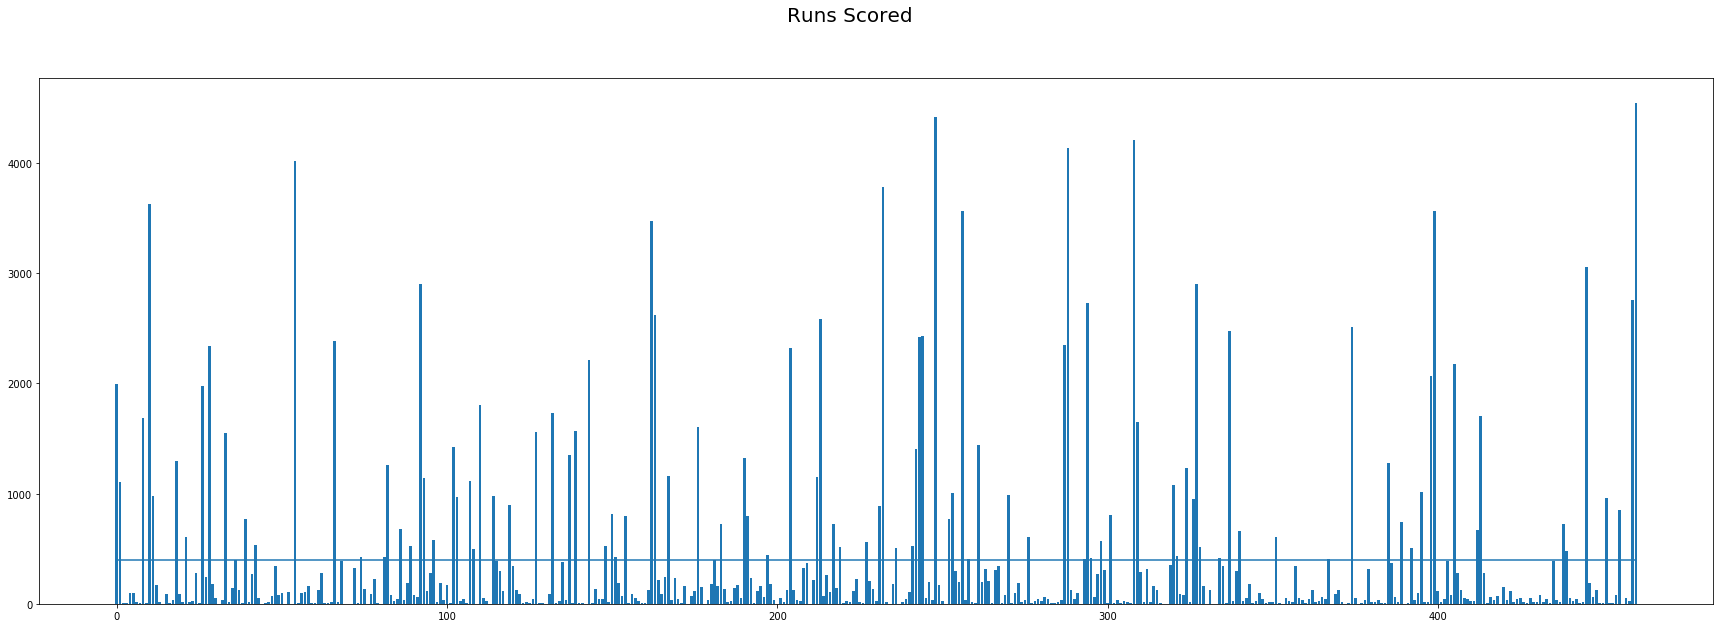

In [38]:
index = np.arange(461)
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom=0.15)
ax = plt.bar(index,  Players_Runs)
plt.suptitle("Runs Scored", fontsize=20)
mean = np.empty(len(player_list))
mean.fill(np.mean(Players_Runs))
plt.plot(index, mean)

### Bar Graph for Average of the player

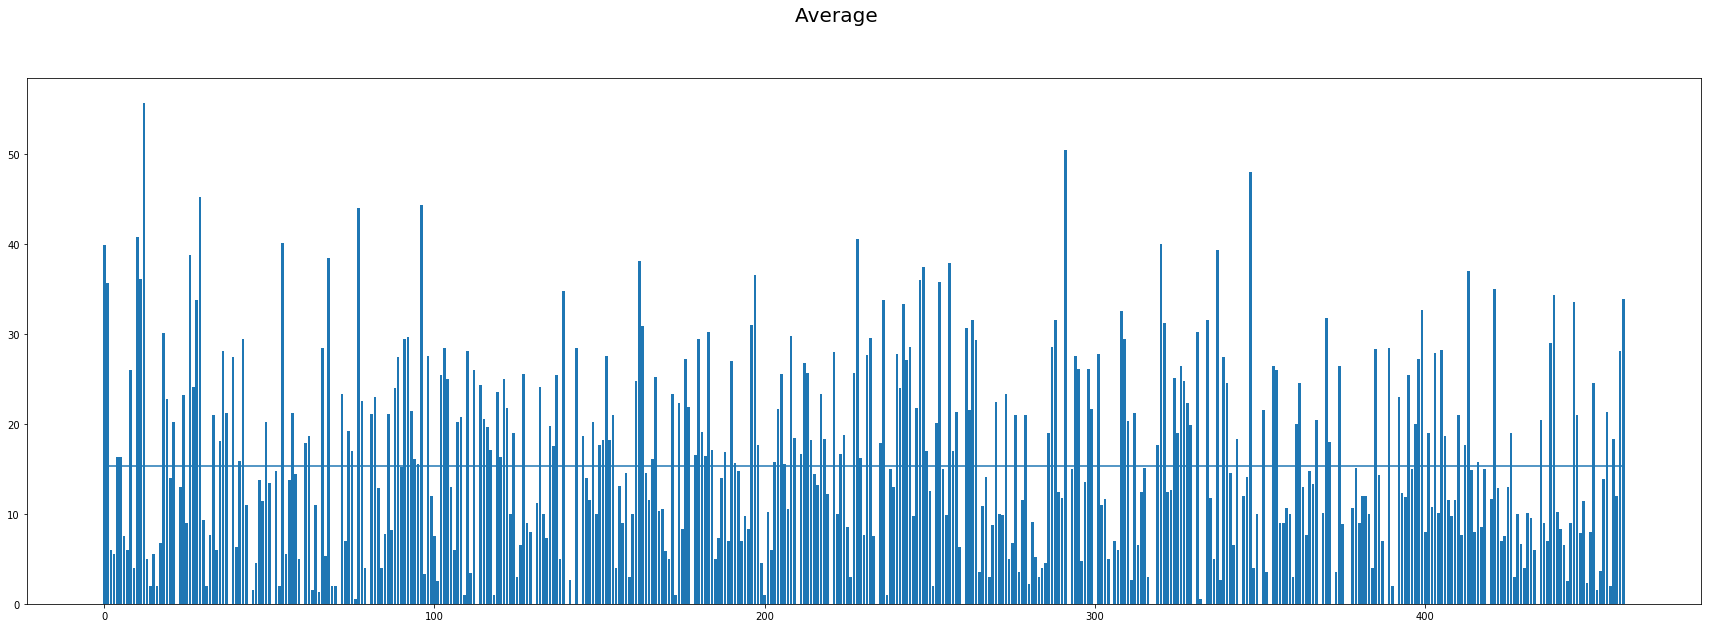

In [39]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom=0.15)
ax = plt.bar(index, P_avg)
plt.suptitle("Average", fontsize=20)
mean = np.empty(len(player_list))
mean.fill(np.mean(P_avg))
plt.plot(index, mean)

### Bar Graph for Strike Rate of the player

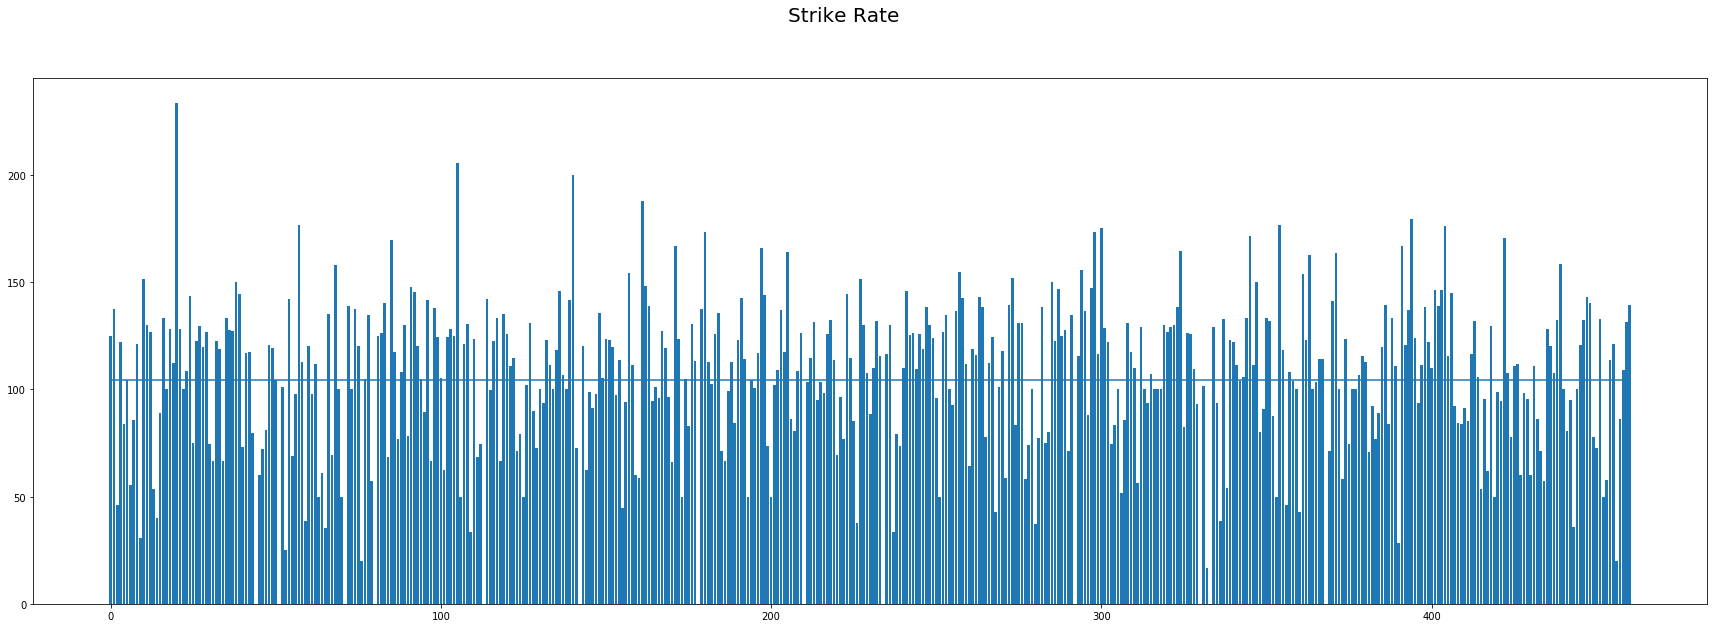

In [40]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom=0.15)
ax = plt.bar(index,  Players_SR)
plt.suptitle("Strike Rate", fontsize=20)
mean = np.empty(len(player_list))
mean.fill(np.mean(Players_SR))
plt.plot(index, mean)

### Bar Graph for Century Scored by the Player

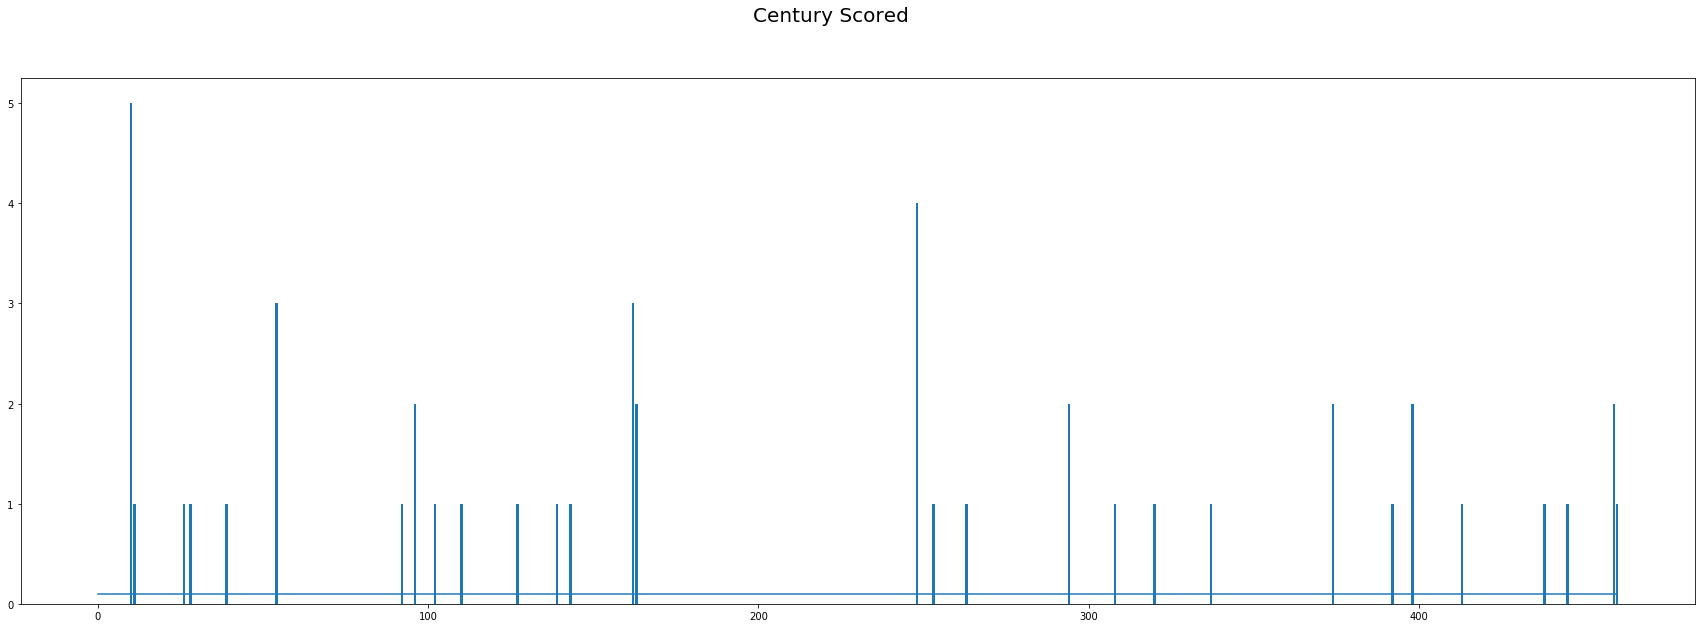

In [41]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom=0.15)
ax = plt.bar(index,  Player_century)
plt.suptitle("Century Scored", fontsize=20)
mean = np.empty(len(player_list))
mean.fill(np.mean(Player_century))
plt.plot(index, mean)

### Bar Graph for Half Century Scored by the Player

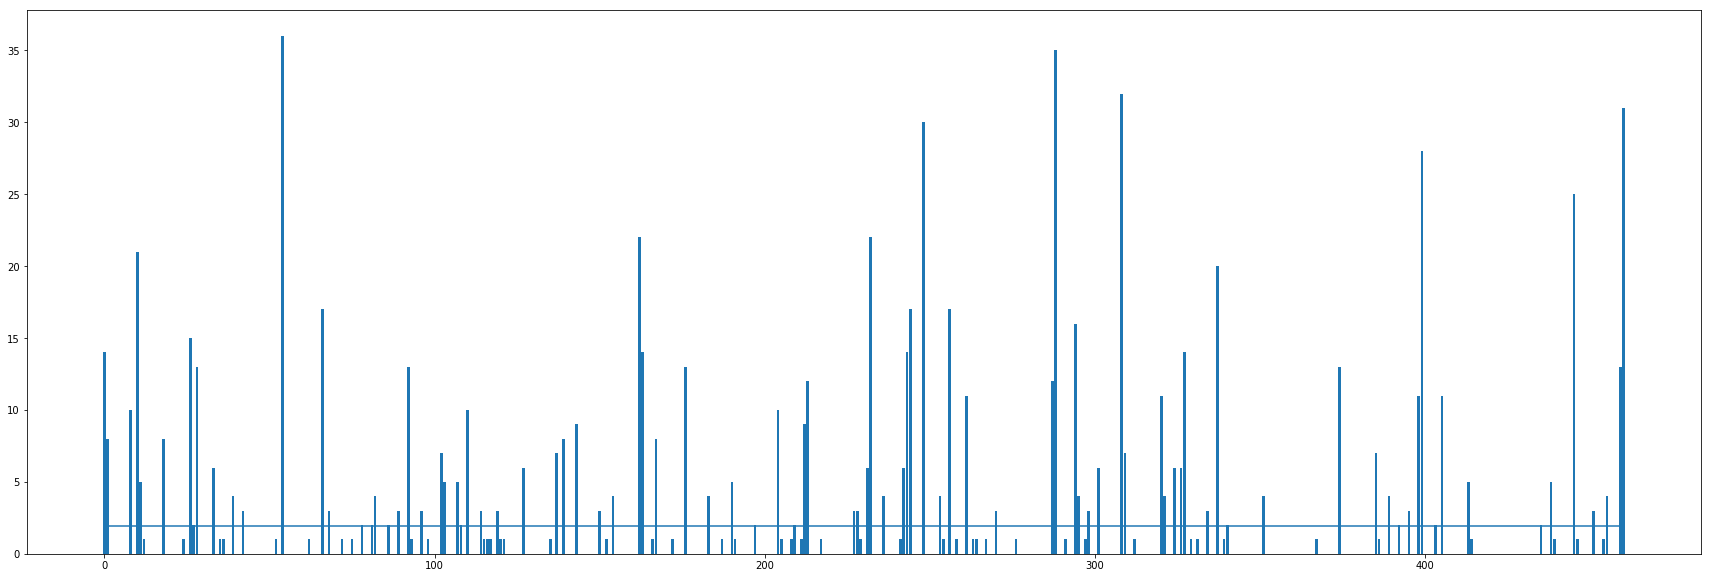

In [42]:
plt.figure(figsize=(30,10))
ax = plt.bar(index,  Player_fifty)

mean = np.empty(len(player_list))
mean.fill(np.mean(Player_fifty))
plt.plot(index, mean)

### Bar Graph for Six Hitted by the Player

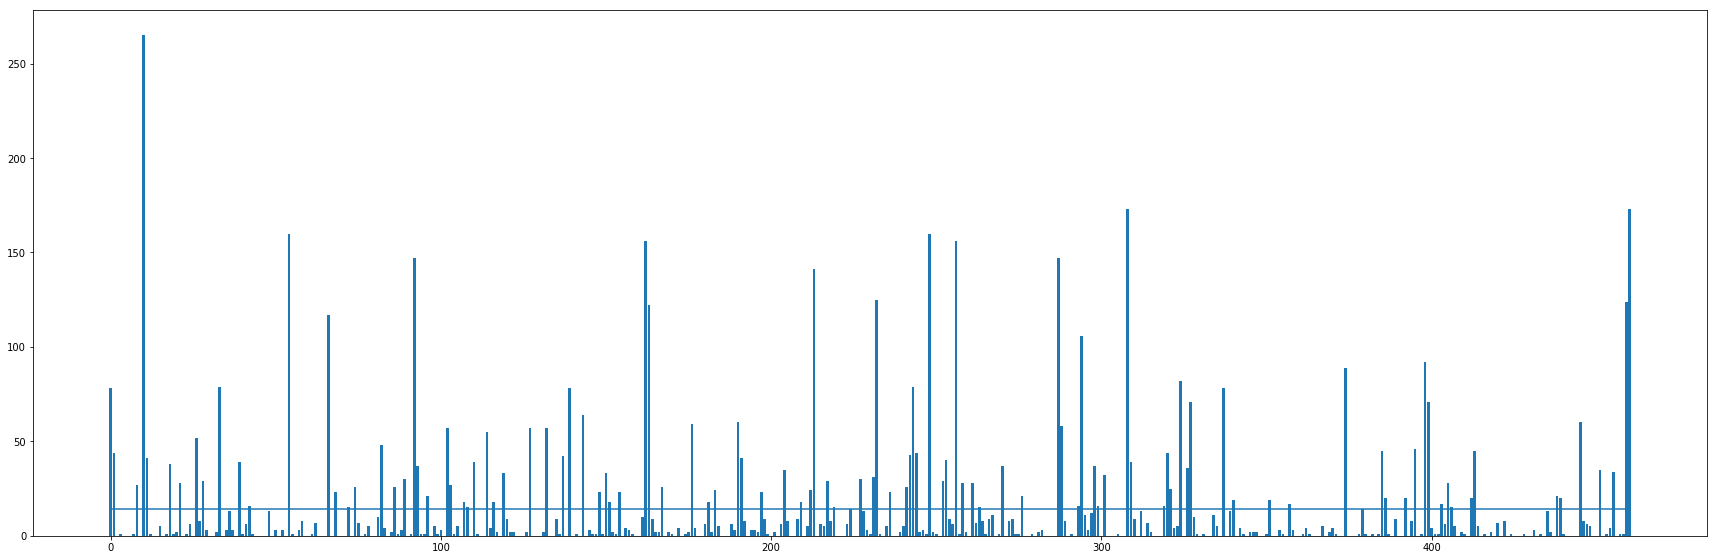

In [43]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom=0.15)
ax = plt.bar(index,  Player_six)

mean = np.empty(len(player_list))
mean.fill(np.mean(Player_six))
plt.plot(index, mean)

### Bar Graph for Four Hitted by the player

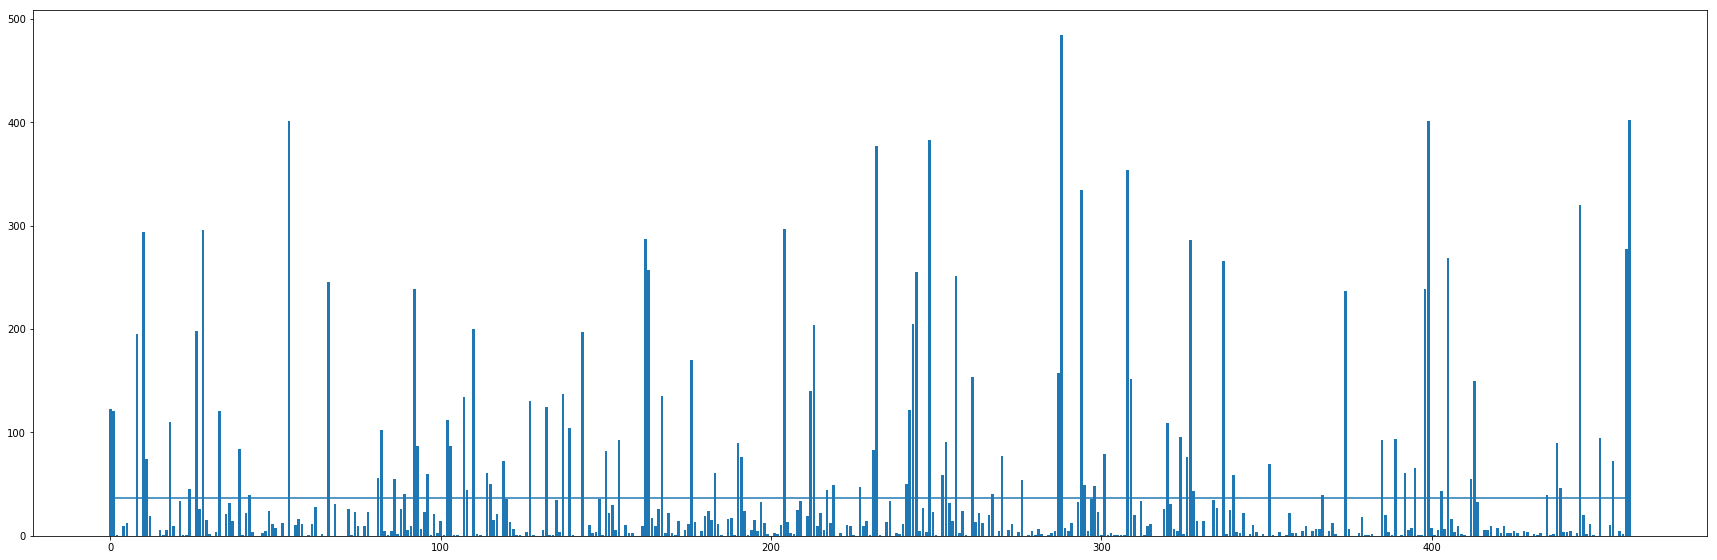

In [44]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom=0.15)
ax = plt.bar(index,  Player_four)

mean = np.empty(len(player_list))
mean.fill(np.mean(Player_four))
plt.plot(index, mean)

### Scatter Plot of Runs Scored vs Strike Rate

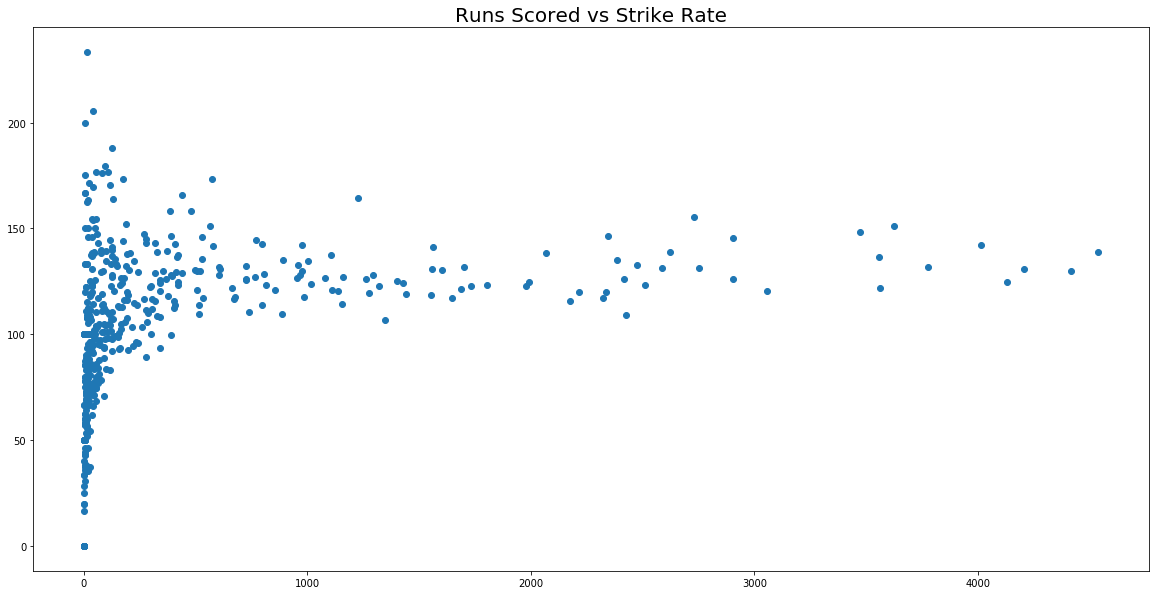

In [45]:
plt.figure(figsize=(20,10))
plt.title("Runs Scored vs Strike Rate", fontsize=20)
plt.scatter(Players_Runs, Players_SR)

### Scatter Plot of Runs Scored vs Average

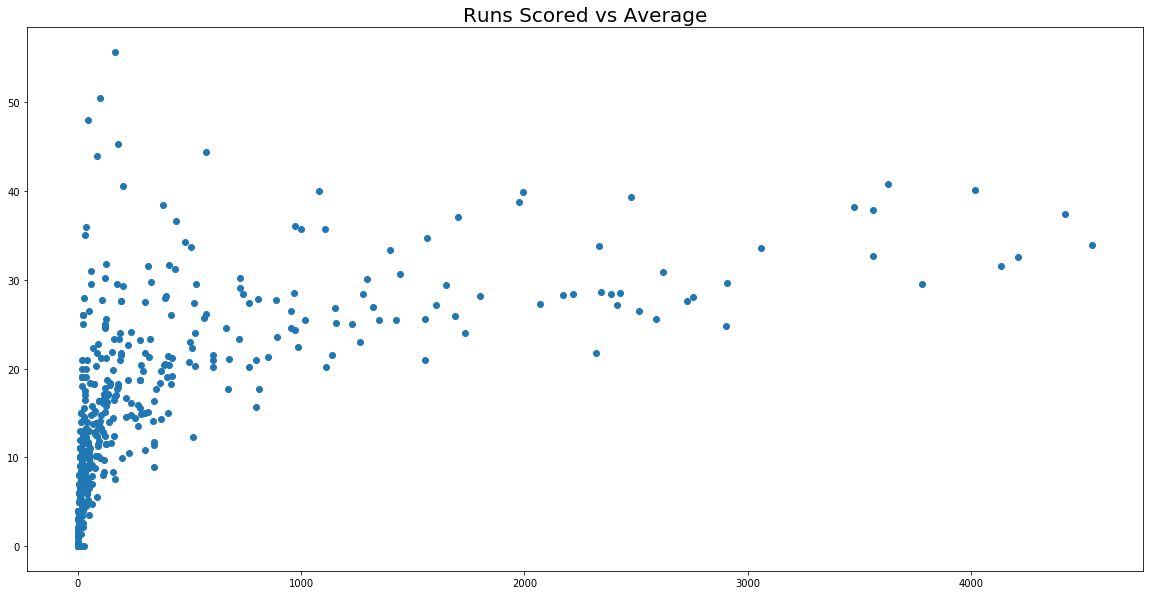

In [46]:
plt.figure(figsize=(20,10))
plt.title("Runs Scored vs Average", fontsize=20)
plt.scatter(Players_Runs, P_avg)

### Function to generate eqautaion of Line

In [47]:
from scipy.optimize import curve_fit
def y(x, m, b):
    return m * x + b

### Scatter Plot of Runs Scored vs Six Hitted

Equation of Line : 0.036264969491593635  * X +  -0.332469379565149


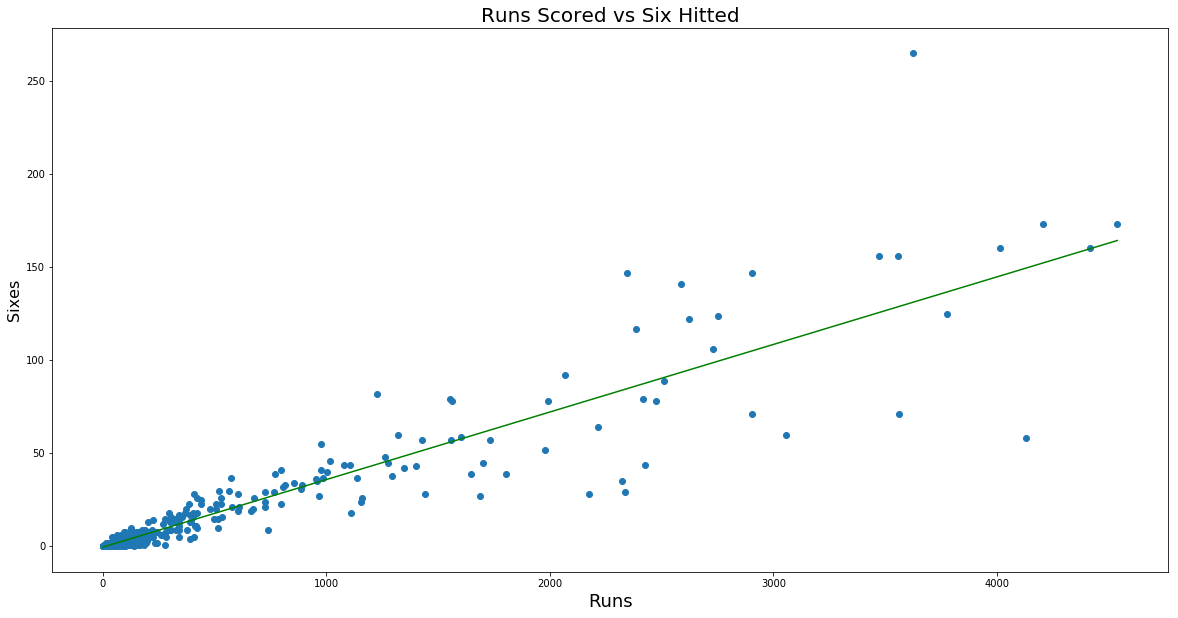

In [48]:
popt, pcov = curve_fit(y, Players_Runs, Player_six)
plt.figure(figsize=(20,10))
plt.title("Runs Scored vs Six Hitted", fontsize=20)
plt.xlabel('Runs', fontsize=18)
plt.ylabel('Sixes', fontsize=16)
plt.scatter(Players_Runs, Player_six)
lines = np.arange(max(Players_Runs))
abline_values = [popt[0] * i + popt[1] for i in lines]
plt.plot(lines,abline_values,'g')
print("Equation of Line :",popt[0]," * X + ",popt[1])

### Scatter Plot of Runs Scored vs Four Scored

Equation of Line : 0.0949201461247442  * X +  -0.9177778158875125


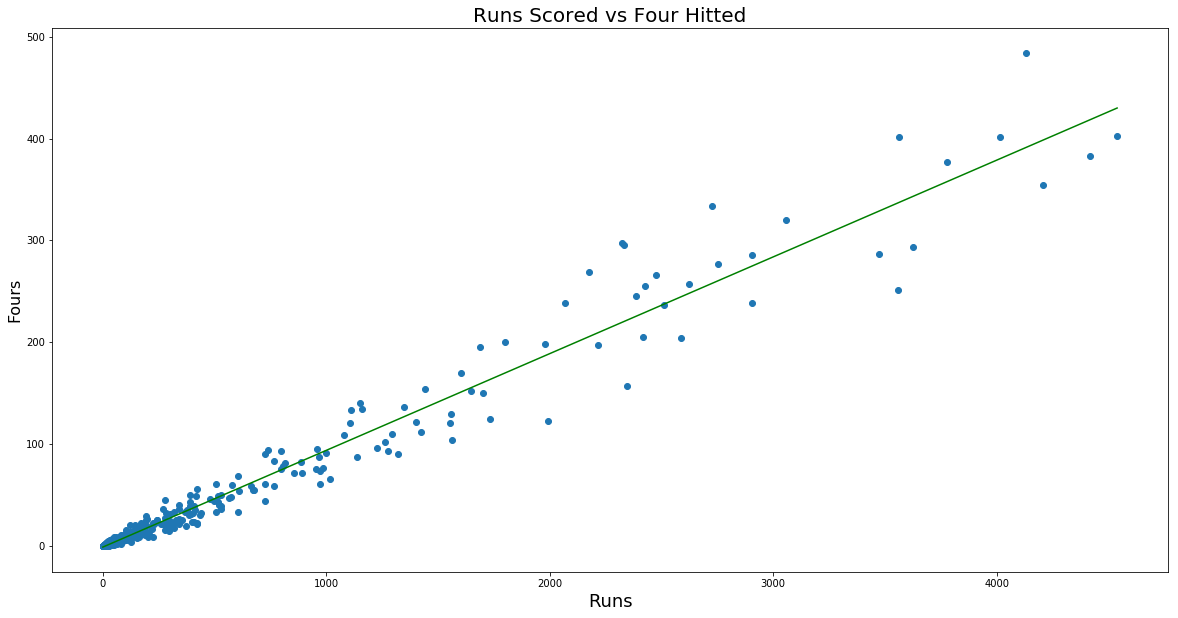

In [49]:
popt, pcov = curve_fit(y, Players_Runs, Player_four)
plt.figure(figsize=(20,10))
plt.title("Runs Scored vs Four Hitted", fontsize=20)
plt.xlabel('Runs', fontsize=18)
plt.ylabel('Fours', fontsize=16)
plt.scatter(Players_Runs,Player_four)
lines = np.arange(max(Players_Runs))
abline_values = [popt[0] * i + popt[1] for i in lines]
plt.plot(lines,abline_values,'g')
print("Equation of Line :",popt[0]," * X + ",popt[1])

### Scatter Plot of Runs Scored vs Total Boundry Scored

Equation of Line : 0.1311851156185173  * X +  -1.2502471954504788


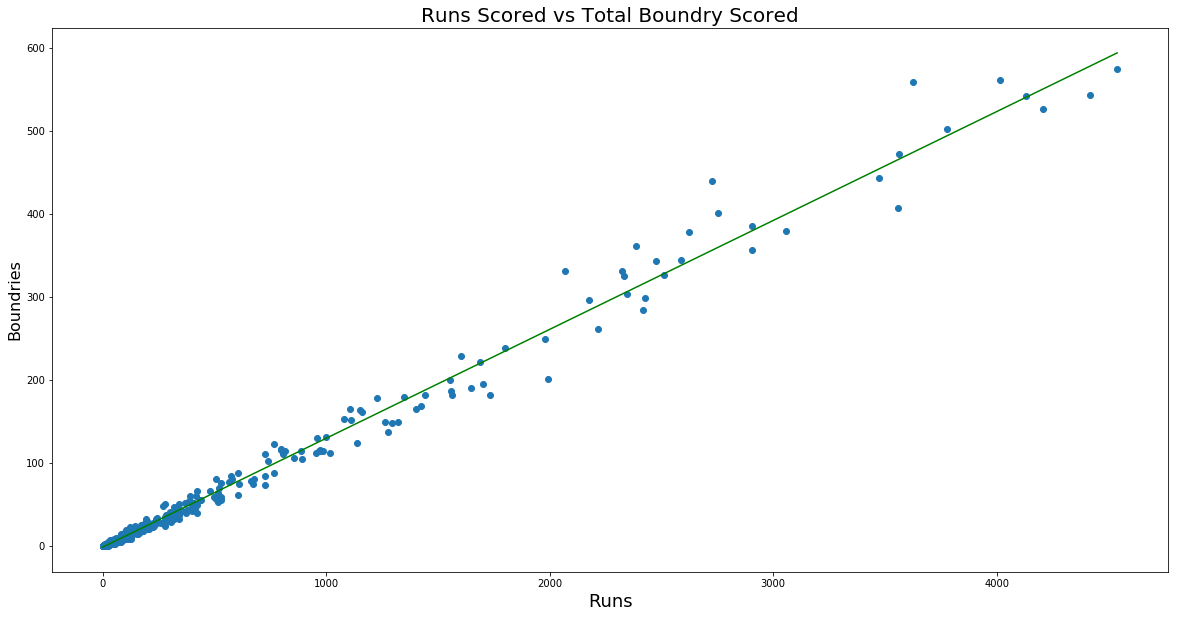

In [50]:
popt, pcov = curve_fit(y, Players_Runs, np.array(Player_four)+np.array(Player_six))
plt.figure(figsize=(20,10))
plt.title("Runs Scored vs Total Boundry Scored", fontsize=20)
plt.xlabel('Runs', fontsize=18)
plt.ylabel('Boundries', fontsize=16)
plt.scatter(Players_Runs,np.array(Player_four)+np.array(Player_six))
lines = np.arange(max(Players_Runs))
abline_values = [popt[0] * i + popt[1] for i in lines]
plt.plot(lines,abline_values,'g')
print("Equation of Line :",popt[0]," * X + ",popt[1])

### Scatter Plot of Six Hitted vs Four Scored

Equation of Line : 0.3482921610104425  * X +  1.2647882985444319


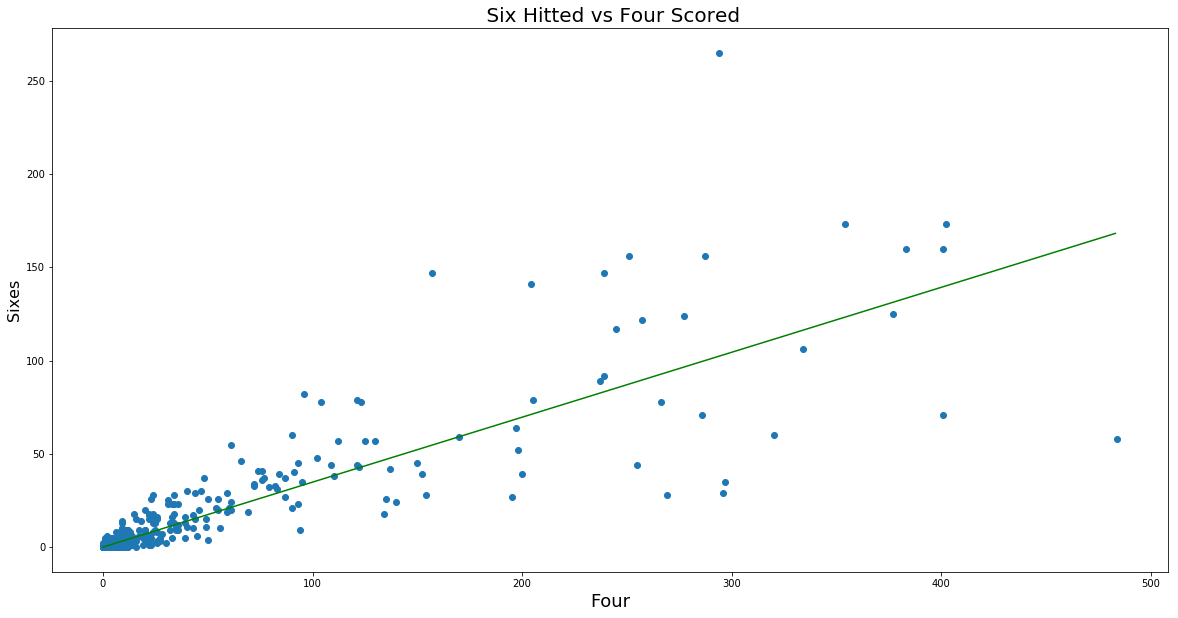

In [51]:
popt, pcov = curve_fit(y,Player_four, Player_six)
plt.figure(figsize=(20,10))
plt.title(" Six Hitted vs Four Scored", fontsize=20)
plt.xlabel('Four', fontsize=18)
plt.ylabel('Sixes', fontsize=16)
plt.scatter(Player_four, Player_six)
lines = np.arange(max(Player_four))
abline_values = [popt[0] * i  for i in lines]
plt.plot(lines,abline_values,'g')
print("Equation of Line :",popt[0]," * X + ",popt[1])

## Finding the TOP-10 Batsman

### Function for printing in markdown

In [52]:
def printmd(string):
    display(Markdown(string))

### TOP-10 Batsman based on Runs Scored

In [53]:
top_runs = sorted(range(len(Players_Runs)), key=lambda i: Players_Runs[i])[-10:]

for value in top_runs[::-1]:
    printmd('**' + player_list[value] + '** : ' + str(Players_Runs[value]))

**SK Raina** : 4540

**V Kohli** : 4418

**RG Sharma** : 4207

**G Gambhir** : 4132

**DA Warner** : 4014

**RV Uthappa** : 3778

**CH Gayle** : 3626

**S Dhawan** : 3561

**MS Dhoni** : 3560

**AB de Villiers** : 3473

### TOP-10 Batsman based on Strike Rate

In [54]:
top_sr = sorted(range(len(Players_SR)), key=lambda i: Players_SR[i])[-10:]

for value in top_sr[::-1]:
    printmd('**' + player_list[value] + '** : ' + str('{0:.2f}'.format(Players_SR[value])))

**DL Chahar** : 233.33

**Umar Gul** : 205.26

**RS Sodhi** : 200.00

**BCJ Cutting** : 187.88

**CR Brathwaite** : 179.25

**AJ Tye** : 176.67

**LJ Wright** : 176.67

**Shahid Afridi** : 176.09

**I Malhotra** : 175.00

**SN Khan** : 173.53

### TOP-10 Batsman based on Average

In [55]:
top_avg = sorted(range(len(P_avg)), key=lambda i: P_avg[i])[-10:]

for value in top_avg[::-1]:
    printmd('**' + player_list[value] + '** : ' + str('{0:.2f}'.format(P_avg[value])))

**MN van Wyk** : 55.67

**V Shankar** : 50.50

**J Suchith** : 48.00

**AC Voges** : 45.25

**HM Amla** : 44.38

**Iqbal Abdulla** : 44.00

**CH Gayle** : 40.74

**PD Collingwood** : 40.60

**DA Warner** : 40.14

**LMP Simmons** : 39.96

### TOP-10 Batsman based on Century Scored

In [56]:
top_century = sorted(range(len(Player_century)), key=lambda i: Player_century[i])[-10:]

for value in top_century[::-1]:
    printmd('**' + player_list[value] + '** : ' + str(Player_century[value]))

**CH Gayle** : 5

**V Kohli** : 4

**AB de Villiers** : 3

**DA Warner** : 3

**BB McCullum** : 2

**AC Gilchrist** : 2

**M Vijay** : 2

**V Sehwag** : 2

**SR Watson** : 2

**HM Amla** : 2

### TOP-10 Batsman based on Half-Century Scored

In [57]:
top_fifty = sorted(range(len(Player_fifty)), key=lambda i: Player_fifty[i])[-10:]

for value in top_fifty[::-1]:
    printmd('**' + player_list[value] + '** : ' + str(Player_fifty[value]))

**DA Warner** : 36

**G Gambhir** : 35

**RG Sharma** : 32

**SK Raina** : 31

**V Kohli** : 30

**S Dhawan** : 28

**AM Rahane** : 25

**RV Uthappa** : 22

**AB de Villiers** : 22

**CH Gayle** : 21

### TOP-10 Batsman based on Six Hitted

In [58]:
top_six = sorted(range(len(Player_six)), key=lambda i: Player_six[i])[-10:]

for value in top_six[::-1]:
    printmd('**' + player_list[value] + '** : ' + str(Player_six[value]))

**CH Gayle** : 265

**SK Raina** : 173

**RG Sharma** : 173

**V Kohli** : 160

**DA Warner** : 160

**MS Dhoni** : 156

**AB de Villiers** : 156

**KA Pollard** : 147

**YK Pathan** : 147

**Yuvraj Singh** : 141

### TOP-10 Batsman based on Four Scored

In [59]:
top_four = sorted(range(len(Player_four)), key=lambda i: Player_four[i])[-10:]

for value in top_four[::-1]:
    printmd('**' + player_list[value] + '** : ' + str(Player_four[value]))

**G Gambhir** : 484

**SK Raina** : 402

**S Dhawan** : 401

**DA Warner** : 401

**V Kohli** : 383

**RV Uthappa** : 377

**RG Sharma** : 354

**V Sehwag** : 334

**AM Rahane** : 320

**PA Patel** : 297